<a href="https://colab.research.google.com/github/ernesmf23/Econometria_st/blob/main/BCRP_SERIES_DE_TIEMPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXTRACCI√ìN, TRANSFORMACI√ìN Y AN√ÅLISIS DE SERIES MACROECON√ìMICAS DEL BCRP CON PYTHON**#

El presente trabajo tiene como objetivo automatizar la descarga, limpieza y an√°lisis de series econ√≥micas oficiales del Banco Central de Reserva del Per√∫ (BCRP), utilizando t√©cnicas de web scraping en Python.
En particular, se emplean herramientas del ecosistema pandas, requests y BeautifulSoup para extraer series hist√≥ricas como el Producto Bruto Interno (PBI), la inflaci√≥n y la tasa de inter√©s en MN, su versi√≥n desestacionalizada, variable claves del desempe√±o macroecon√≥mico del pa√≠s.


Este enfoque permite replicar, actualizar y analizar en tiempo real indicadores econ√≥micos directamente desde la fuente oficial sin necesidad de cargar archivos manualmente ni usar interfaces gr√°ficas.
El trabajo tambi√©n busca sentar las bases para una exploraci√≥n m√°s profunda de las relaciones entre inflaci√≥n, crecimiento y tasas de inter√©s en el Per√∫, elementos fundamentales para el an√°lisis de coyuntura econ√≥mica y la formulaci√≥n de pol√≠ticas p√∫blicas.

**Librerias usadas:**

*   `requests` para hacer peticiones HTTP a la web del BCRP.
*   `BeautifulSoup` para parsear el contenido HTML.
*   `pandas` para manipular los datos como DataFrames.
*   `matplotlib.pyplot` para graficar.


**Funci√≥n para web scraping:**

```
def scraping_bcrp(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table')
    df = pd.read_html(str(tables[1]))[0]
    return df
```

Esta funci√≥n es una funci√≥n reutilizable que encapsula el proceso de web scraping de manera robusta y clara. Toma como entrada una URL de una serie del BCRP en formato HTML.

Extrae la segunda tabla (√≠ndice 1), la convierte en un **DataFrame** (`df` ya es un pandas.DataFrame, extra√≠do desde la tabla HTML. As√≠ que puedes manipularlo como cualquier DataFrame: filtrar, agrupar, visualizar, guardar, etc.), y la devuelve.


**Carga y preparaci√≥n de la serie original**

```
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01728AM/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI']
pbi['Fecha'] = pd.date_range(start="1995-01-01", periods=len(pbi), freq='MS')
```

*   url: variable que toma el link de la serie
*   pbi: variable que se le asigna la funcion de web sacrping para extraer el datos y descargar la serie
*   pbi.columns: renombra las columnas
*   pbi['Fecha']: Se construye una columna de fechas comenzando en enero de 1995 (esto por ahora es manual, la idea es automatizarlo), asumiendo periodicidad mensual (tambi√©n es manual por ahora, la idea es automatizarlo).





**Filtrar series**

```
# Filtrar desde enero 1993 hasta la √∫ltima fecha autom√°ticamente
pbi_filtrado = pbi[pbi['Fecha'] >= '1993-01-01']
```

```
# Filtrar desde enero 1993 hasta una fecha determinada, filtrar por rango de fechas
pbi_filtrado = pbi[(pbi['Fecha'] >= '1993-01-01') & (pbi['Fecha'] <= '2024-12-01')]
```



#IMPORTACI√ìN DE SERIES TEMPORALES DEL BCRP#

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def scraping_bcrp(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table')
    df = pd.read_html(str(tables[1]))[0]
    return df

#PBI MENSUAL

##Variaci√≥n porcentual interanual

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01728AM/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI']
pbi['Fecha'] = pd.date_range(start="1995-01-01", periods=len(pbi), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


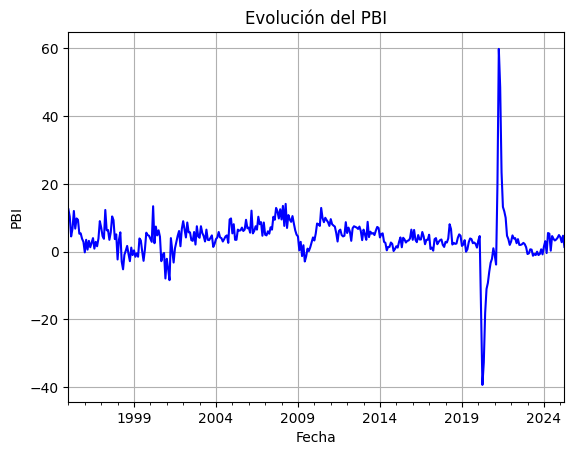

In [ ]:
# L√≠nea temporal
pbi.plot(x='Fecha', y='PBI', title='Evoluci√≥n del PBI', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI')
plt.grid(True)
plt.show()

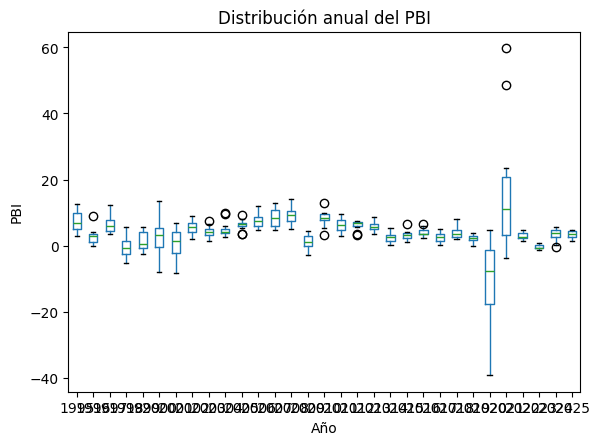

In [ ]:
# Boxplot por a√±o
pbi['A√±o'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI', by='A√±o', grid=False)
plt.title('Distribuci√≥n anual del PBI')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('PBI')
plt.show()

##Variaci√≥n interanual desestacionalizado (Var. Mensual)

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01731AM/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI Desestacionalizado']
pbi['Fecha'] = pd.date_range(start="2003-02-01", periods=len(pbi), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


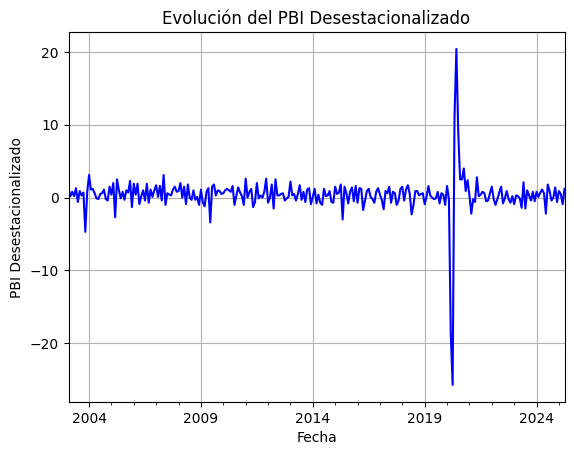

In [ ]:
# L√≠nea temporal
pbi.plot(x='Fecha', y='PBI Desestacionalizado', title='Evoluci√≥n del PBI Desestacionalizado', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI Desestacionalizado')
plt.grid(True)
plt.show()

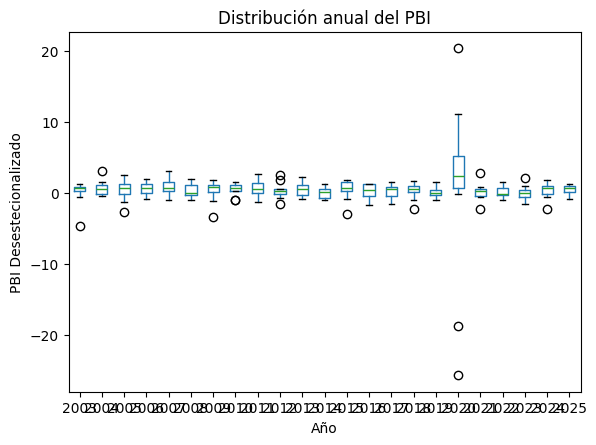

In [ ]:
# Boxplot por a√±o
pbi['A√±o'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI Desestacionalizado', by='A√±o', grid=False)
plt.title('Distribuci√≥n anual del PBI')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('PBI Desestecionalizado')
plt.show()

##Variaci√≥n interanual desestacionalizado (Var. promedio m√≥vil 3 meses)

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN38082AM/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI Desestacionalizado 3 meses']
pbi['Fecha'] = pd.date_range(start="2003-04-01", periods=len(pbi), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


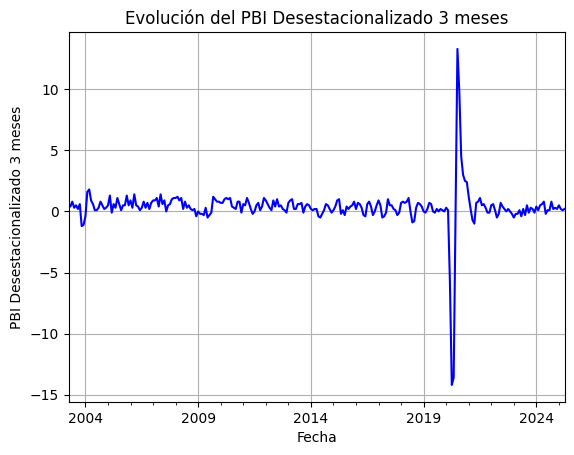

In [ ]:
# L√≠nea temporal
pbi.plot(x='Fecha', y='PBI Desestacionalizado 3 meses', title='Evoluci√≥n del PBI Desestacionalizado 3 meses', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI Desestacionalizado 3 meses')
plt.grid(True)
plt.show()

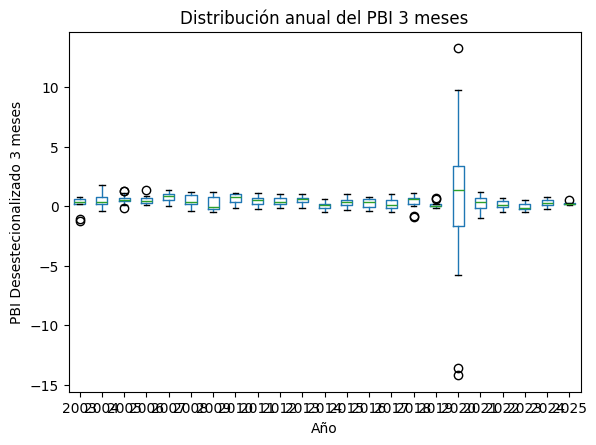

In [ ]:
# Boxplot por a√±o
pbi['A√±o'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI Desestacionalizado 3 meses', by='A√±o', grid=False)
plt.title('Distribuci√≥n anual del PBI 3 meses')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('PBI Desestecionalizado 3 meses')
plt.show()

##√çndice 2007 = 100

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01770AM/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI (Indice 2007=100)']
pbi['Fecha'] = pd.date_range(start="1994-01-01", periods=len(pbi), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


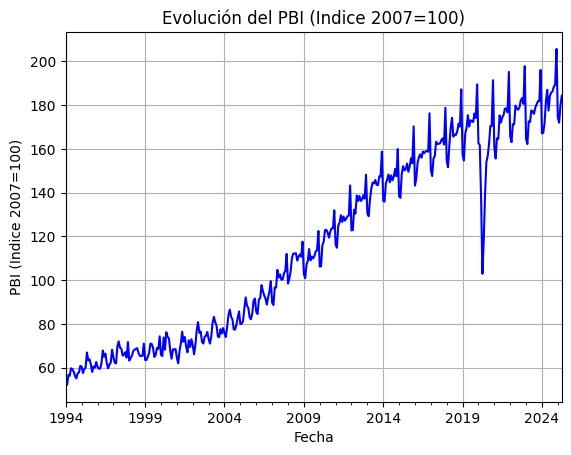

In [ ]:
# L√≠nea temporal
pbi.plot(x='Fecha', y='PBI (Indice 2007=100)', title='Evoluci√≥n del PBI (Indice 2007=100)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI (Indice 2007=100)')
plt.grid(True)
plt.show()

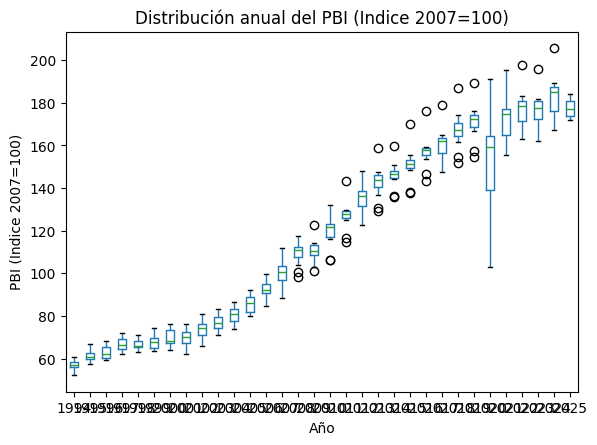

In [ ]:
# Boxplot por a√±o
pbi['A√±o'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI (Indice 2007=100)', by='A√±o', grid=False)
plt.title('Distribuci√≥n anual del PBI (Indice 2007=100)')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('PBI (Indice 2007=100)')
plt.show()

###Tasa de crecimiento del producto a 12 meses (interanual)

In [ ]:
print(pbi)
pbi['Tasa_crecimiento_12m'] = pbi['PBI (Indice 2007=100)'].pct_change(periods=12) * 100
pbi_bcrp = pbi.copy() #Renombrando para trabajar con la serie en adelante
print(pbi_bcrp)

         Fecha  PBI (Indice 2007=100)   A√±o
0   1994-01-01                   53.8  1994
1   1994-02-01                   52.1  1994
2   1994-03-01                   56.7  1994
3   1994-04-01                   56.3  1994
4   1994-05-01                   59.7  1994
..         ...                    ...   ...
371 2024-12-01                  205.7  2024
372 2025-01-01                  174.3  2025
373 2025-02-01                  172.0  2025
374 2025-03-01                  179.9  2025
375 2025-04-01                  184.3  2025

[376 rows x 3 columns]
         Fecha  PBI (Indice 2007=100)   A√±o  Tasa_crecimiento_12m
0   1994-01-01                   53.8  1994                   NaN
1   1994-02-01                   52.1  1994                   NaN
2   1994-03-01                   56.7  1994                   NaN
3   1994-04-01                   56.3  1994                   NaN
4   1994-05-01                   59.7  1994                   NaN
..         ...                    ...   ...       

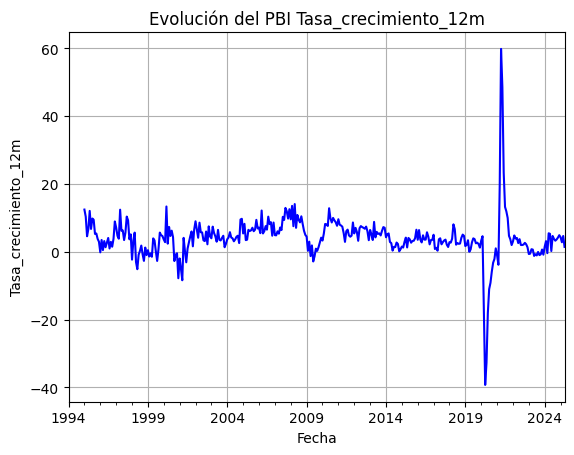

In [ ]:
# L√≠nea temporal
pbi_bcrp.plot(x='Fecha', y='Tasa_crecimiento_12m', title='Evoluci√≥n del PBI Tasa_crecimiento_12m', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('Tasa_crecimiento_12m')
plt.grid(True)
plt.show()

###Tasa de crecimiento interanual filtrado de 1994 a 2004

In [ ]:
pbi_fil1 = pbi[(pbi['Fecha'] >= '1993-01-01') & (pbi['Fecha'] <= '2004-12-01')]
print(pbi_fil1)

         Fecha  PBI (Indice 2007=100)   A√±o  Tasa_crecimiento_12m
0   1994-01-01                   53.8  1994                   NaN
1   1994-02-01                   52.1  1994                   NaN
2   1994-03-01                   56.7  1994                   NaN
3   1994-04-01                   56.3  1994                   NaN
4   1994-05-01                   59.7  1994                   NaN
..         ...                    ...   ...                   ...
127 2004-08-01                   77.5  2004              4.447439
128 2004-09-01                   77.4  2004              4.736130
129 2004-10-01                   79.6  2004              2.577320
130 2004-11-01                   82.8  2004              9.523810
131 2004-12-01                   85.7  2004              9.731114

[132 rows x 4 columns]


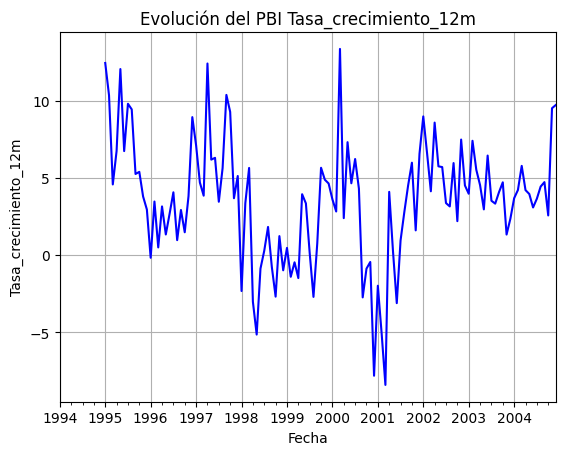

In [ ]:
# L√≠nea temporal
pbi_fil1.plot(x='Fecha', y='Tasa_crecimiento_12m', title='Evoluci√≥n del PBI Tasa_crecimiento_12m', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('Tasa_crecimiento_12m')
plt.grid(True)
plt.show()

/tmp/ipython-input-19-1542896603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi_fil1['A√±o'] = pbi_fil1['Fecha'].dt.year


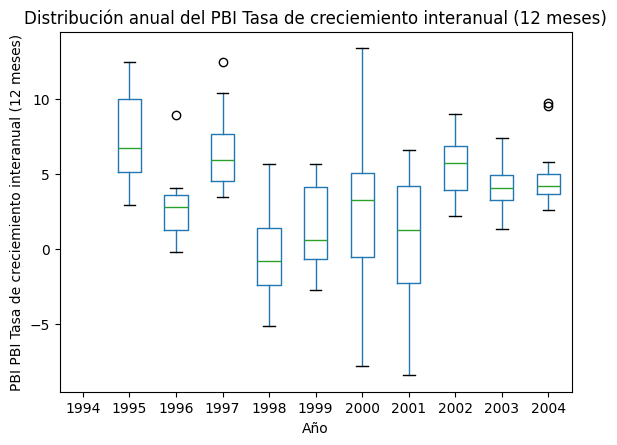

In [ ]:
# Boxplot por a√±o
pbi_fil1['A√±o'] = pbi_fil1['Fecha'].dt.year
pbi_fil1.boxplot(column='Tasa_crecimiento_12m', by='A√±o', grid=False)
plt.title('Distribuci√≥n anual del PBI Tasa de creciemiento interanual (12 meses)')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('PBI PBI Tasa de creciemiento interanual (12 meses)')
plt.show()

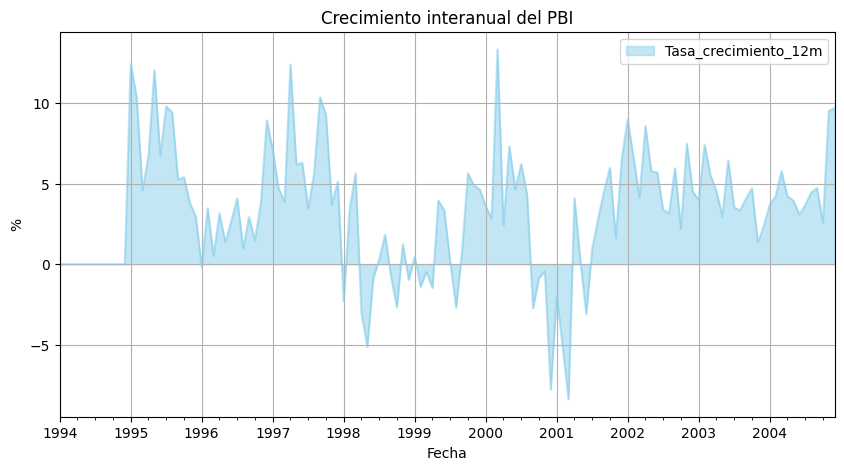

In [ ]:
# Gr√°fico de bandas o √°reas
pbi_fil1.plot.area(x='Fecha', y='Tasa_crecimiento_12m', alpha=0.5, figsize=(10, 5), color='skyblue', stacked=False)
plt.title('Crecimiento interanual del PBI')
plt.ylabel('%')
plt.grid(True)
plt.show()

/tmp/ipython-input-21-126843073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi_fil1['Decada'] = (pbi_fil1['Fecha'].dt.year // 10) * 10


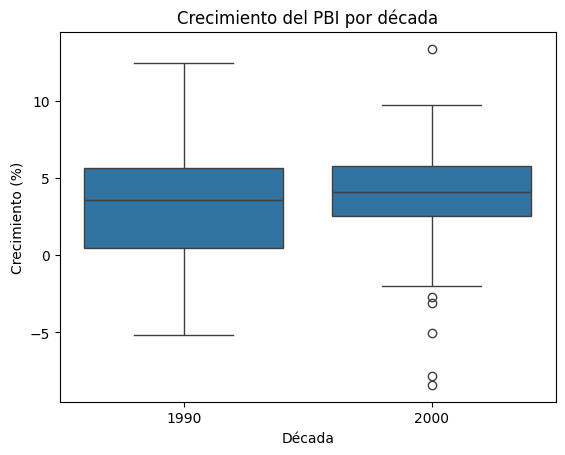

In [ ]:
# Boxplot comparativo entre d√©cadas o gobiernos

pbi_fil1['Decada'] = (pbi_fil1['Fecha'].dt.year // 10) * 10

sns.boxplot(x='Decada', y='Tasa_crecimiento_12m', data=pbi_fil1)
plt.title('Crecimiento del PBI por d√©cada')
plt.xlabel('D√©cada')
plt.ylabel('Crecimiento (%)')
plt.show()

##Desestacionalizado (Indice 2007=100) - mensual

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01773AM/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI desestacionalizado (Indice 2007=100)']
pbi['Fecha'] = pd.date_range(start="2003-01-01", periods=len(pbi), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


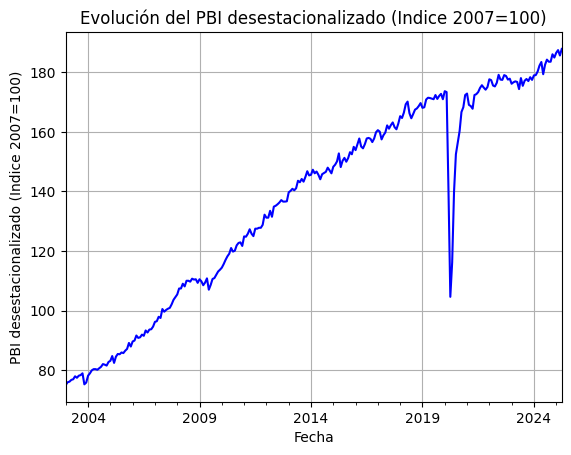

In [ ]:
# L√≠nea temporal
pbi.plot(x='Fecha', y='PBI desestacionalizado (Indice 2007=100)', title='Evoluci√≥n del PBI desestacionalizado (Indice 2007=100)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI desestacionalizado (Indice 2007=100)')
plt.grid(True)
plt.show()

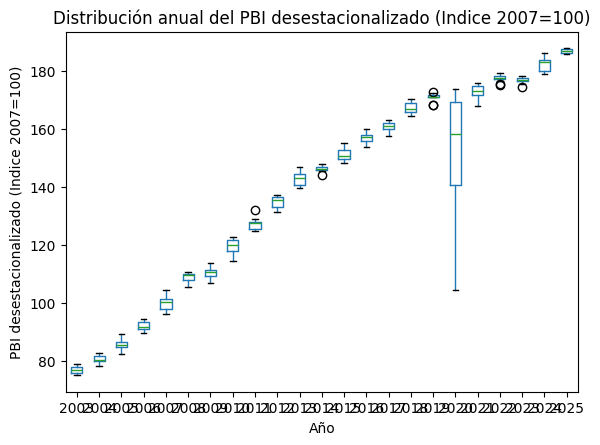

In [ ]:
# Boxplot por a√±o
pbi['A√±o'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI desestacionalizado (Indice 2007=100)', by='A√±o', grid=False)
plt.title('Distribuci√≥n anual del PBI desestacionalizado (Indice 2007=100)')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('PBI desestacionalizado (Indice 2007=100)')
plt.show()

##Desestacionalizado promedio m√≥vil a 3 meses (Indice 2007=100)

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN38081AM/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI desestacionalizado 3 meses (Indice 2007=100)']
pbi['Fecha'] = pd.date_range(start="2003-03-01", periods=len(pbi), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


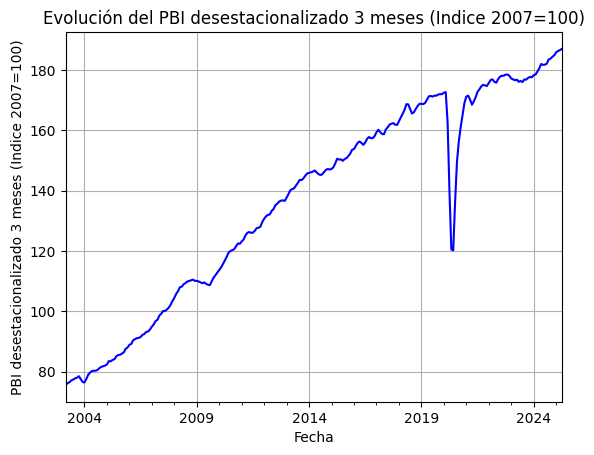

In [ ]:
# L√≠nea temporal
pbi.plot(x='Fecha', y='PBI desestacionalizado 3 meses (Indice 2007=100)', title='Evoluci√≥n del PBI desestacionalizado 3 meses (Indice 2007=100)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI desestacionalizado 3 meses (Indice 2007=100)')
plt.grid(True)
plt.show()

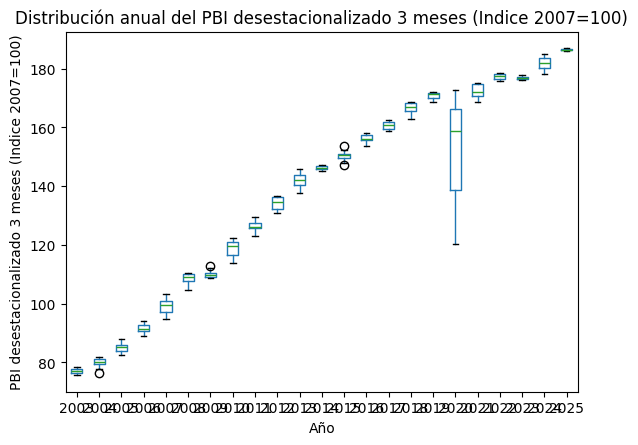

In [ ]:
# Boxplot por a√±o
pbi['A√±o'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI desestacionalizado 3 meses (Indice 2007=100)', by='A√±o', grid=False)
plt.title('Distribuci√≥n anual del PBI desestacionalizado 3 meses (Indice 2007=100)')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('PBI desestacionalizado 3 meses (Indice 2007=100)')
plt.show()

#PBI TRIMESTRAL#

##En Millones de Soles del 2007 (real)#

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/resultados/PN02538AQ/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI real mill. de soles']
pbi['Fecha'] = pd.date_range(start="1979-01-01", periods=len(pbi), freq='QS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


In [ ]:
print(pbi.head(10))

       Fecha  PBI real mill. de soles
0 1979-01-01                    34514
1 1979-04-01                    40882
2 1979-07-01                    40671
3 1979-10-01                    42183
4 1980-01-01                    36357
5 1980-04-01                    43102
6 1980-07-01                    42344
7 1980-10-01                    45792
8 1981-01-01                    39026
9 1981-04-01                    45858


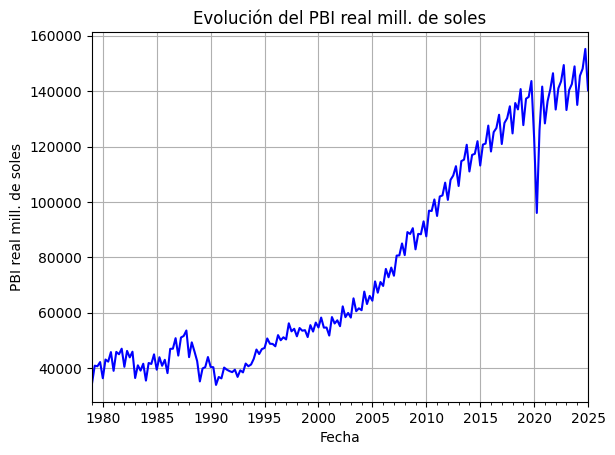

In [ ]:
# L√≠nea temporal
pbi.plot(x='Fecha', y='PBI real mill. de soles', title='Evoluci√≥n del PBI real mill. de soles', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI real mill. de soles')
plt.grid(True)
plt.show()

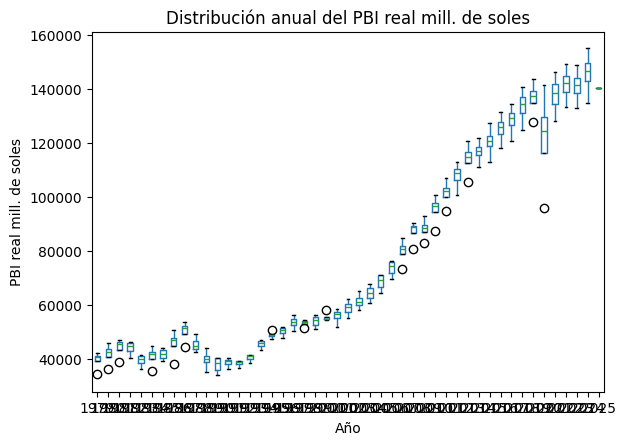

In [ ]:
# Boxplot por a√±o
pbi['A√±o'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI real mill. de soles', by='A√±o', grid=False)
plt.title('Distribuci√≥n anual del PBI real mill. de soles')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('PBI real mill. de soles')
plt.show()

##En Millones de D√≥lares##

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/resultados/PN39029BQ/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI real mill. de dolares']
pbi['Fecha'] = pd.date_range(start="1994-01-01", periods=len(pbi), freq='QS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


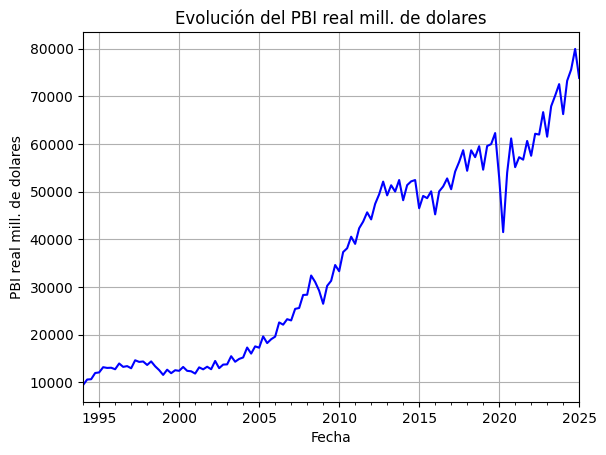

In [ ]:
# L√≠nea temporal
pbi.plot(x='Fecha', y='PBI real mill. de dolares', title='Evoluci√≥n del PBI real mill. de dolares', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI real mill. de dolares')
plt.grid(True)
plt.show()

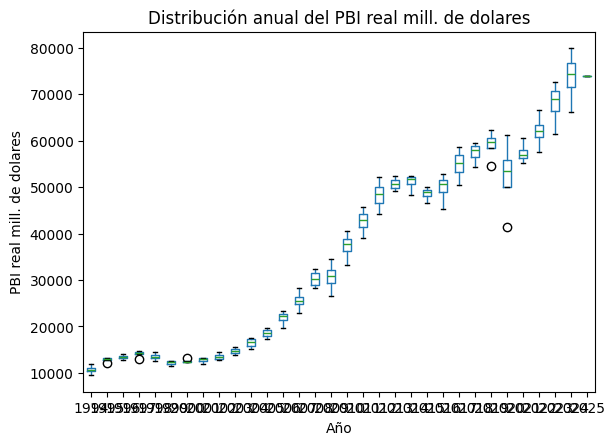

In [ ]:
# Boxplot por a√±o
pbi['A√±o'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI real mill. de dolares', by='A√±o', grid=False)
plt.title('Distribuci√≥n anual del PBI real mill. de dolares')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('PBI real mill. de dolares')
plt.show()

##Variaciones porcentuales reales anualizadas

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/resultados/PN02526AQ/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI Var % real anualizada']
pbi['Fecha'] = pd.date_range(start="1980-01-01", periods=len(pbi), freq='QS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


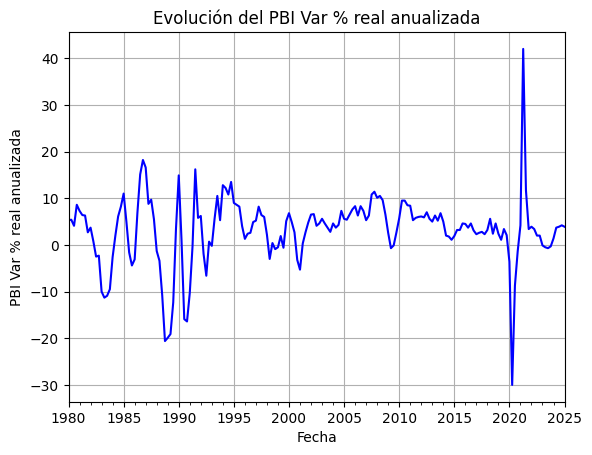

In [ ]:
# L√≠nea temporal
pbi.plot(x='Fecha', y='PBI Var % real anualizada', title='Evoluci√≥n del PBI Var % real anualizada', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI Var % real anualizada')
plt.grid(True)
plt.show()

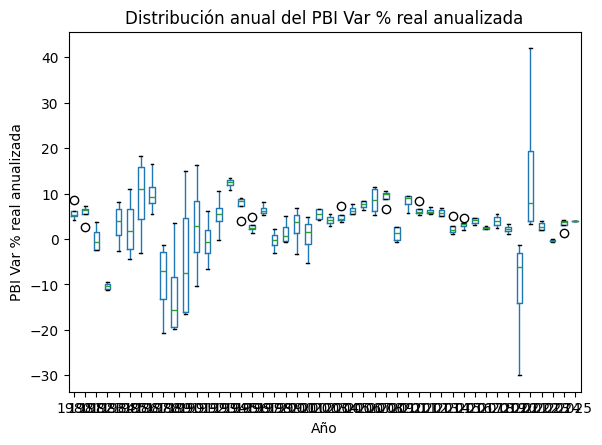

In [ ]:
# Boxplot por a√±o
pbi['A√±o'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI Var % real anualizada', by='A√±o', grid=False)
plt.title('Distribuci√≥n anual del PBI Var % real anualizada')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('PBI Var % real anualizada')
plt.show()

##Variaciones porcentuales reales anaulizadas desestacionalizadas

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/resultados/PN37939AQ/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI Var % real anualizada desestacionalizada']
pbi['Fecha'] = pd.date_range(start="2007-04-01", periods=len(pbi), freq='QS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


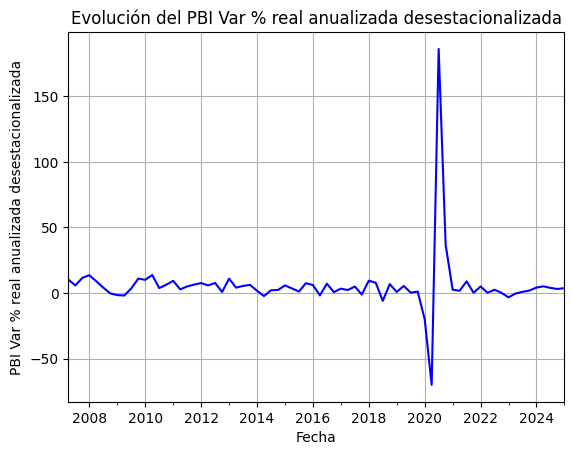

In [ ]:
# L√≠nea temporal
pbi.plot(x='Fecha', y='PBI Var % real anualizada desestacionalizada', title='Evoluci√≥n del PBI Var % real anualizada desestacionalizada', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI Var % real anualizada desestacionalizada')
plt.grid(True)
plt.show()

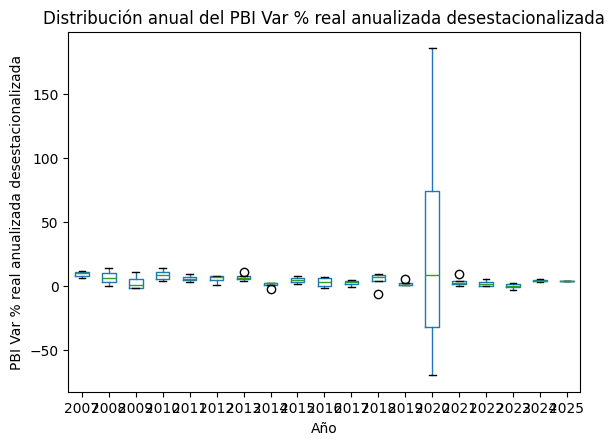

In [ ]:
# Boxplot por a√±o
pbi['A√±o'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI Var % real anualizada desestacionalizada', by='A√±o', grid=False)
plt.title('Distribuci√≥n anual del PBI Var % real anualizada desestacionalizada')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('PBI Var % real anualizada desestacionalizada')
plt.show()

##En Millones de soles (Nominal)

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/resultados/PN02550AQ/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI nominal en mill de soles']
pbi['Fecha'] = pd.date_range(start="1980-01-01", periods=len(pbi), freq='QS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


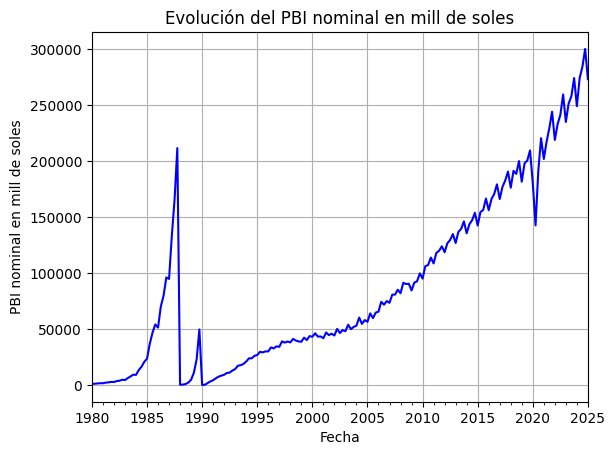

In [ ]:
# L√≠nea temporal
pbi.plot(x='Fecha', y='PBI nominal en mill de soles', title='Evoluci√≥n del PBI nominal en mill de soles', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI nominal en mill de soles')
plt.grid(True)
plt.show()

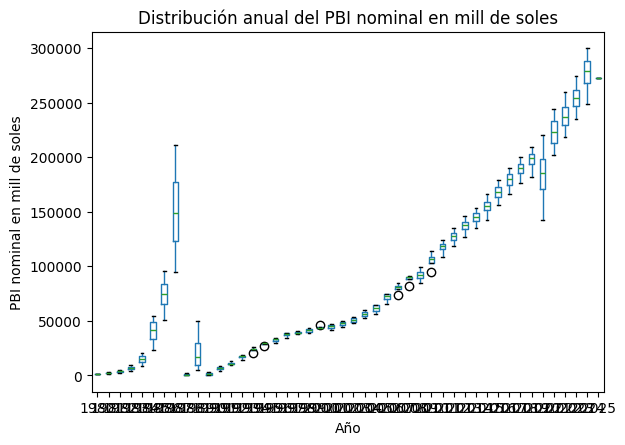

In [ ]:
# Boxplot por a√±o
pbi['A√±o'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI nominal en mill de soles', by='A√±o', grid=False)
plt.title('Distribuci√≥n anual del PBI nominal en mill de soles')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('PBI nominal en mill de soles')
plt.show()

#IPC MENSUAL

##IPC (√çndice Dic 2021 = 100)

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN38705PM/html"
ipc = scraping_bcrp(url)
ipc.columns = ['Fecha', 'IPC (√çndice Dic 2021=100)']
ipc['Fecha'] = pd.date_range(start="1991-01-01", periods=len(ipc), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
pd.reset_option("all")

/tmp/ipython-input-46-3365680546.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option("all")
/tmp/ipython-input-46-3365680546.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option("all")


In [ ]:
print(ipc)

         Fecha  IPC (√çndice Dic 2021=100)
0   1991-01-01                       7.39
1   1991-02-01                       8.09
2   1991-03-01                       8.71
3   1991-04-01                       9.22
4   1991-05-01                       9.93
..         ...                        ...
408 2025-01-01                     114.07
409 2025-02-01                     114.28
410 2025-03-01                     115.21
411 2025-04-01                     115.57
412 2025-05-01                     115.51

[413 rows x 2 columns]


In [ ]:
# L√≠nea temporal
ipc.plot(x='Fecha', y='IPC (√çndice Dic 2021=100)', title='Evoluci√≥n del IPC (√çndice Dic 2021=100)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('IPC (√çndice Dic 2021=100)')
plt.grid(True)
plt.show()

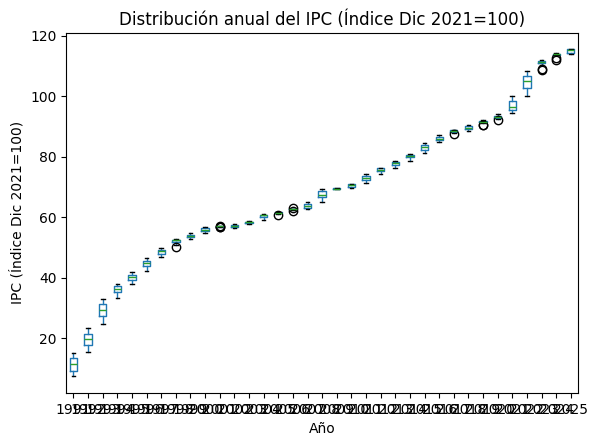

In [ ]:
# Boxplot por a√±o
ipc['A√±o'] = ipc['Fecha'].dt.year
ipc.boxplot(column='IPC (√çndice Dic 2021=100)', by='A√±o', grid=False)
plt.title('Distribuci√≥n anual del IPC (√çndice Dic 2021=100)')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('IPC (√çndice Dic 2021=100)')
plt.show()

##IPC (√çndice 2009 = 100) descontinuada

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01270PM/html"
ipc_2009 = scraping_bcrp(url)
ipc_2009.columns = ['Fecha', 'IPC (√çndice 2009 = 100)']
ipc_2009['Fecha'] = pd.date_range(start="1949-01-01", periods=len(ipc_2009), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


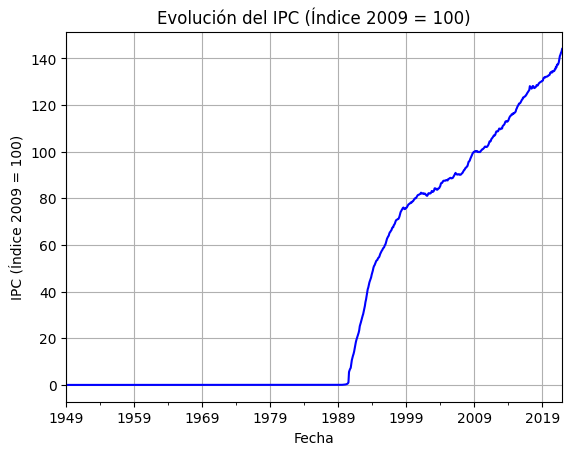

In [ ]:
# L√≠nea temporal
ipc_2009.plot(x='Fecha', y='IPC (√çndice 2009 = 100)', title='Evoluci√≥n del IPC (√çndice 2009 = 100)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('IPC (√çndice 2009 = 100)')
plt.grid(True)
plt.show()

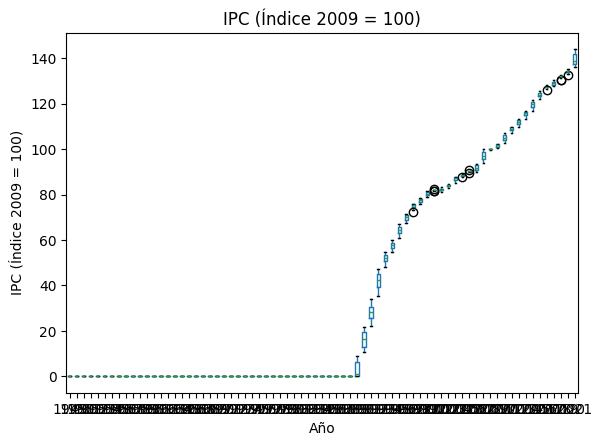

In [ ]:
# Boxplot por a√±o
ipc_2009['A√±o'] = ipc_2009['Fecha'].dt.year
ipc_2009.boxplot(column='IPC (√çndice 2009 = 100)', by='A√±o', grid=False)
plt.title('IPC (√çndice 2009 = 100)')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('IPC (√çndice 2009 = 100)')
plt.show()

##IPC Var % Mensual

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01271PM/html"
ipc_mens = scraping_bcrp(url)
ipc_mens.columns = ['Fecha', 'IPC (Var % Mensual)']
ipc_mens['Fecha'] = pd.date_range(start="1949-02-01", periods=len(ipc_mens), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


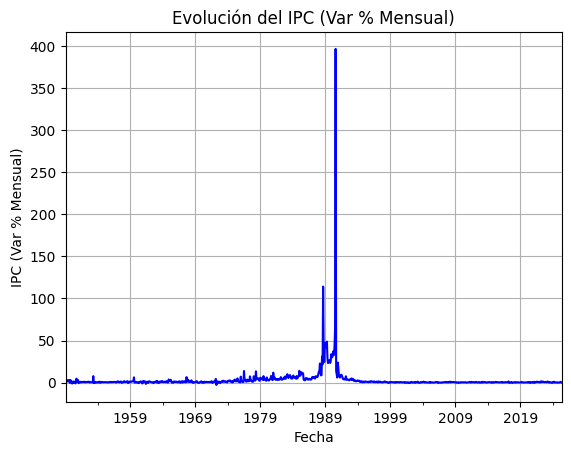

In [ ]:
# L√≠nea temporal
ipc_mens.plot(x='Fecha', y='IPC (Var % Mensual)', title='Evoluci√≥n del IPC (Var % Mensual)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('IPC (Var % Mensual)')
plt.grid(True)
plt.show()

In [ ]:
# Boxplot por a√±o
ipc_mens['A√±o'] = ipc_mens['Fecha'].dt.year
ipc_mens.boxplot(column='IPC (Var % Mensual)', by='A√±o', grid=False)
plt.title('IPC (Var % Mensual)')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('IPC (Var % Mensual)')
plt.show()

##IPC Var % Mensual Acumulada

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01272PM/html"
ipc_acum = scraping_bcrp(url)
ipc_acum.columns = ['Fecha', 'IPC (Var % Mensual acumulada)']
ipc_acum['Fecha'] = pd.date_range(start="1950-01-01", periods=len(ipc_acum), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


In [ ]:
# L√≠nea temporal
ipc_acum.plot(x='Fecha', y='IPC (Var % Mensual acumulada)', title='Evoluci√≥n del IPC (Var % Mensual acumulada)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('IPC (Var % Mensual acumulada)')
plt.grid(True)
plt.show()

In [ ]:
# Boxplot por a√±o
ipc_acum['A√±o'] = ipc_acum['Fecha'].dt.year
ipc_acum.boxplot(column='IPC (Var % Mensual acumulada)', by='A√±o', grid=False)
plt.title('IPC (Var % Mensual acumulada)')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('IPC (Var % Mensual acumulada)')
plt.show()

##IPC Var % 12 meses

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01273PM/html"
ipc_12 = scraping_bcrp(url)
ipc_12.columns = ['Fecha', 'IPC (Var % 12 meses)']
ipc_12['Fecha'] = pd.date_range(start="1950-01-01", periods=len(ipc_12), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


In [ ]:
# L√≠nea temporal
ipc_12.plot(x='Fecha', y='IPC (Var % 12 meses)', title='Evoluci√≥n del IPC (Var % 12 meses)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('IPC (Var % 12 meses)')
plt.grid(True)
plt.show()

In [ ]:
# Boxplot por a√±o
ipc_12['A√±o'] = ipc_12['Fecha'].dt.year
ipc_12.boxplot(column='IPC (Var % 12 meses)', by='A√±o', grid=False)
plt.title('IPC (Var % 12 meses)')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('IPC (Var % 12 meses)')
plt.show()

In [ ]:
ipc_fil1 = ipc_12[ipc_12['Fecha'] >= '1993-01-01']
print(ipc_fil1)

         Fecha  IPC (Var % 12 meses)   A√±o
516 1993-01-01                 58.71  1993
517 1993-02-01                 55.97  1993
518 1993-03-01                 51.32  1993
519 1993-04-01                 53.16  1993
520 1993-05-01                 52.56  1993
..         ...                   ...   ...
900 2025-01-01                  1.85  2025
901 2025-02-01                  1.48  2025
902 2025-03-01                  1.28  2025
903 2025-04-01                  1.65  2025
904 2025-05-01                  1.69  2025

[389 rows x 3 columns]


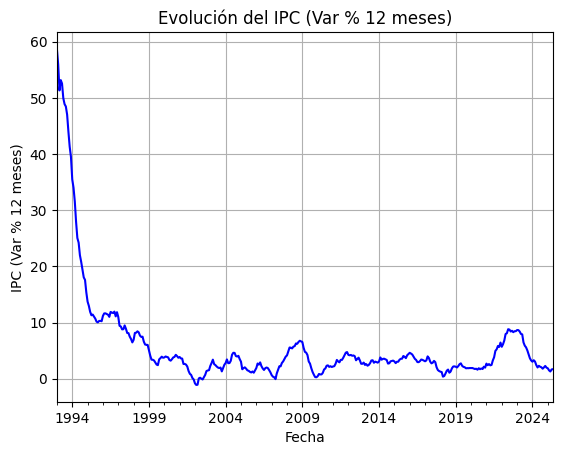

In [ ]:
# L√≠nea temporal
ipc_fil1.plot(x='Fecha', y='IPC (Var % 12 meses)', title='Evoluci√≥n del IPC (Var % 12 meses)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('IPC (Var % 12 meses)')
plt.grid(True)
plt.show()

In [ ]:
ipc_fil2 = ipc_12[(ipc_12['Fecha'] >= '1993-01-01') & (ipc_12['Fecha'] <= '2004-12-01')]
print(ipc_fil2)

# L√≠nea temporal
ipc_fil2.plot(x='Fecha', y='IPC (Var % 12 meses)', title='Evoluci√≥n del IPC (Var % 12 meses)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('IPC (Var % 12 meses)')
plt.grid(True)
plt.show()

         Fecha  IPC (Var % 12 meses)   A√±o
516 1993-01-01                 58.71  1993
517 1993-02-01                 55.97  1993
518 1993-03-01                 51.32  1993
519 1993-04-01                 53.16  1993
520 1993-05-01                 52.56  1993
..         ...                   ...   ...
655 2004-08-01                  4.59  2004
656 2004-09-01                  4.03  2004
657 2004-10-01                  3.95  2004
658 2004-11-01                  4.07  2004
659 2004-12-01                  3.48  2004

[144 rows x 3 columns]


##Graficando las series del IPC juntas

In [ ]:
# 1. Filtrar por periodo
start_date = '1993-01-01'
end_date = '2004-12-01'

ipc_g = ipc[(ipc['Fecha'] >= start_date) & (ipc['Fecha'] <= end_date)]
ipc_mens_g = ipc_mens[(ipc_mens['Fecha'] >= start_date) & (ipc_mens['Fecha'] <= end_date)]
ipc_acum_g = ipc_acum[(ipc_acum['Fecha'] >= start_date) & (ipc_acum['Fecha'] <= end_date)]
ipc_12_g = ipc_12[(ipc_12['Fecha'] >= start_date) & (ipc_12['Fecha'] <= end_date)]

# 2. Unir en un solo DataFrame por 'Fecha'
df_merged = ipc_g[['Fecha']].copy()

df_merged['IPC √çndice'] = ipc_g['IPC (√çndice Dic 2021=100)'].values
df_merged['Var. mensual (%)'] = ipc_mens_g['IPC (Var % Mensual)'].values
df_merged['Var. acumulada (%)'] = ipc_acum_g['IPC (Var % Mensual acumulada)'].values
df_merged['Inflaci√≥n 12m (%)'] = ipc_12_g['IPC (Var % 12 meses)'].values


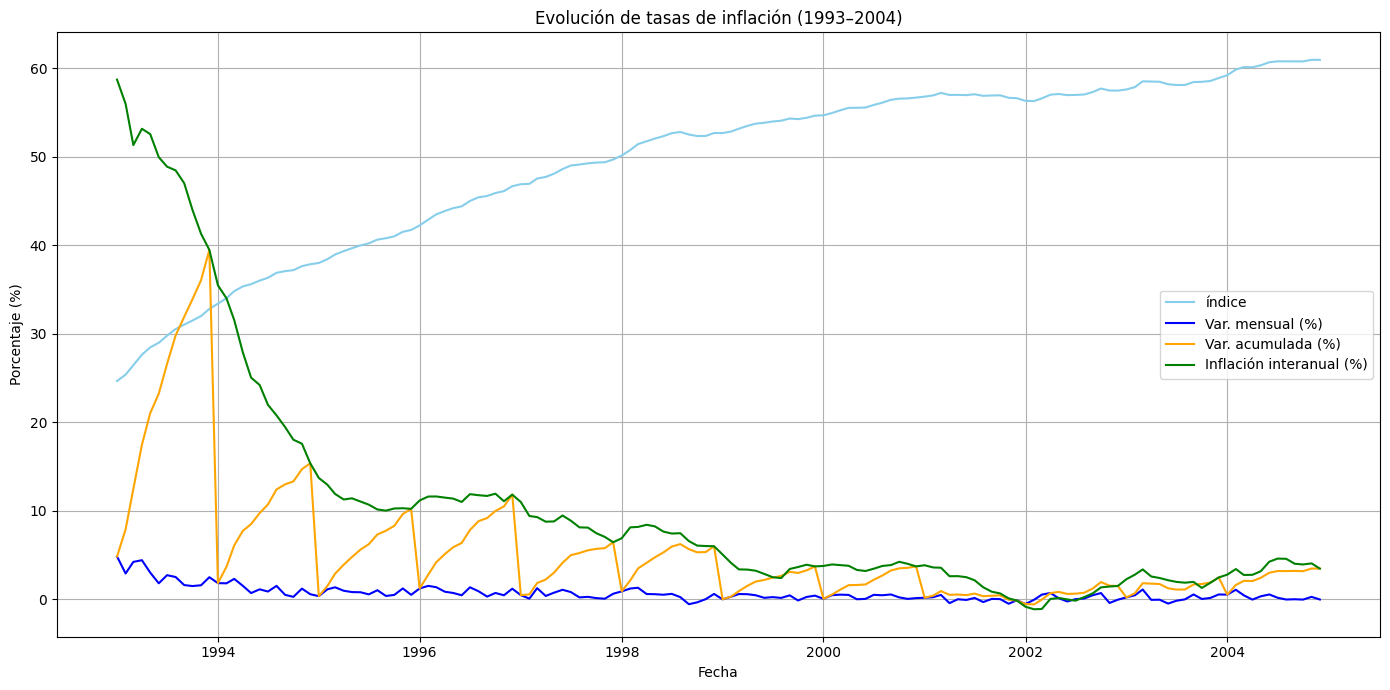

In [ ]:
# 3. Graficar las 3 tasas (omitimos el √≠ndice IPC base)
plt.figure(figsize=(14, 7))

plt.plot(df_merged['Fecha'], df_merged['IPC √çndice'], label='√≠ndice', color='skyblue')
plt.plot(df_merged['Fecha'], df_merged['Var. mensual (%)'], label='Var. mensual (%)', color='blue')
plt.plot(df_merged['Fecha'], df_merged['Var. acumulada (%)'], label='Var. acumulada (%)', color='orange')
plt.plot(df_merged['Fecha'], df_merged['Inflaci√≥n 12m (%)'], label='Inflaci√≥n interanual (%)', color='green')

plt.title('Evoluci√≥n de tasas de inflaci√≥n (1993‚Äì2004)')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##Generando las series de IPC a partir de IPC(√çndice Dic 2021 = 100)

**1. Variaci√≥n % mensual (Inflaci√≥n mensual)**

$$
\text{Var.% mensual}_t = \left( \frac{IPC_t - IPC_{t-1}}{IPC_{t-1}} \right) \times 100
$$




In [ ]:
ipc['Var_mensual_%'] = ipc['IPC (√çndice Dic 2021=100)'].pct_change(periods=1) * 100
print(ipc)

         Fecha  IPC (√çndice Dic 2021=100)   A√±o  Var_mensual_%
0   1991-01-01                       7.39  1991            NaN
1   1991-02-01                       8.09  1991       9.472260
2   1991-03-01                       8.71  1991       7.663782
3   1991-04-01                       9.22  1991       5.855339
4   1991-05-01                       9.93  1991       7.700651
..         ...                        ...   ...            ...
408 2025-01-01                     114.07  2025      -0.087589
409 2025-02-01                     114.28  2025       0.184097
410 2025-03-01                     115.21  2025       0.813791
411 2025-04-01                     115.57  2025       0.312473
412 2025-05-01                     115.51  2025      -0.051917

[413 rows x 4 columns]


**2. Variaci√≥n % acumulada en el a√±o (enero a t)**


$$
\text{Var.% acumulada}_t = \left( \frac{IPC_t - IPC_{\text{enero del a√±o}}}{IPC_{\text{enero del a√±o}}} \right) \times 100
$$

Se compara cada mes con el valor de enero del mismo a√±o.

In [ ]:
# Aseg√∫rate de tener columna de a√±o y mes
ipc['A√±o'] = ipc['Fecha'].dt.year
ipc['Mes'] = ipc['Fecha'].dt.month

# Calcular IPC de enero de cada a√±o
ipc['IPC_enero'] = ipc.groupby('A√±o')['IPC (√çndice Dic 2021=100)'].transform('first')

# Variaci√≥n acumulada
ipc['Var_acumulada_%'] = (ipc['IPC (√çndice Dic 2021=100)'] - ipc['IPC_enero']) / ipc['IPC_enero'] * 100
print(ipc)

         Fecha  IPC (√çndice Dic 2021=100)   A√±o  Var_mensual_%  Mes  \
0   1991-01-01                       7.39  1991            NaN    1   
1   1991-02-01                       8.09  1991       9.472260    2   
2   1991-03-01                       8.71  1991       7.663782    3   
3   1991-04-01                       9.22  1991       5.855339    4   
4   1991-05-01                       9.93  1991       7.700651    5   
..         ...                        ...   ...            ...  ...   
408 2025-01-01                     114.07  2025      -0.087589    1   
409 2025-02-01                     114.28  2025       0.184097    2   
410 2025-03-01                     115.21  2025       0.813791    3   
411 2025-04-01                     115.57  2025       0.312473    4   
412 2025-05-01                     115.51  2025      -0.051917    5   

     IPC_enero  Var_acumulada_%  
0         7.39         0.000000  
1         7.39         9.472260  
2         7.39        17.861976  
3        

**3. Variaci√≥n % interanual (12 meses) ‚Üí Inflaci√≥n anual**

$$
\text{Inflaci√≥n interanual}_t = \left( \frac{IPC_t - IPC_{\text{t-12}}}{IPC_{\text{t-12}}} \right) \times 100
$$


In [ ]:
ipc['Inflaci√≥n_12m_%'] = ipc['IPC (√çndice Dic 2021=100)'].pct_change(periods=12) * 100
print(ipc)

         Fecha  IPC (√çndice Dic 2021=100)   A√±o  Var_mensual_%  Mes  \
0   1991-01-01                       7.39  1991            NaN    1   
1   1991-02-01                       8.09  1991       9.472260    2   
2   1991-03-01                       8.71  1991       7.663782    3   
3   1991-04-01                       9.22  1991       5.855339    4   
4   1991-05-01                       9.93  1991       7.700651    5   
..         ...                        ...   ...            ...  ...   
408 2025-01-01                     114.07  2025      -0.087589    1   
409 2025-02-01                     114.28  2025       0.184097    2   
410 2025-03-01                     115.21  2025       0.813791    3   
411 2025-04-01                     115.57  2025       0.312473    4   
412 2025-05-01                     115.51  2025      -0.051917    5   

     IPC_enero  Var_acumulada_%  Inflaci√≥n_12m_%  
0         7.39         0.000000              NaN  
1         7.39         9.472260           

In [ ]:
# Filtrar el periodo 1993-2004
ipc_filtrado = ipc[(ipc['Fecha'] >= '1993-01-01') & (ipc['Fecha'] <= '2004-12-01')]

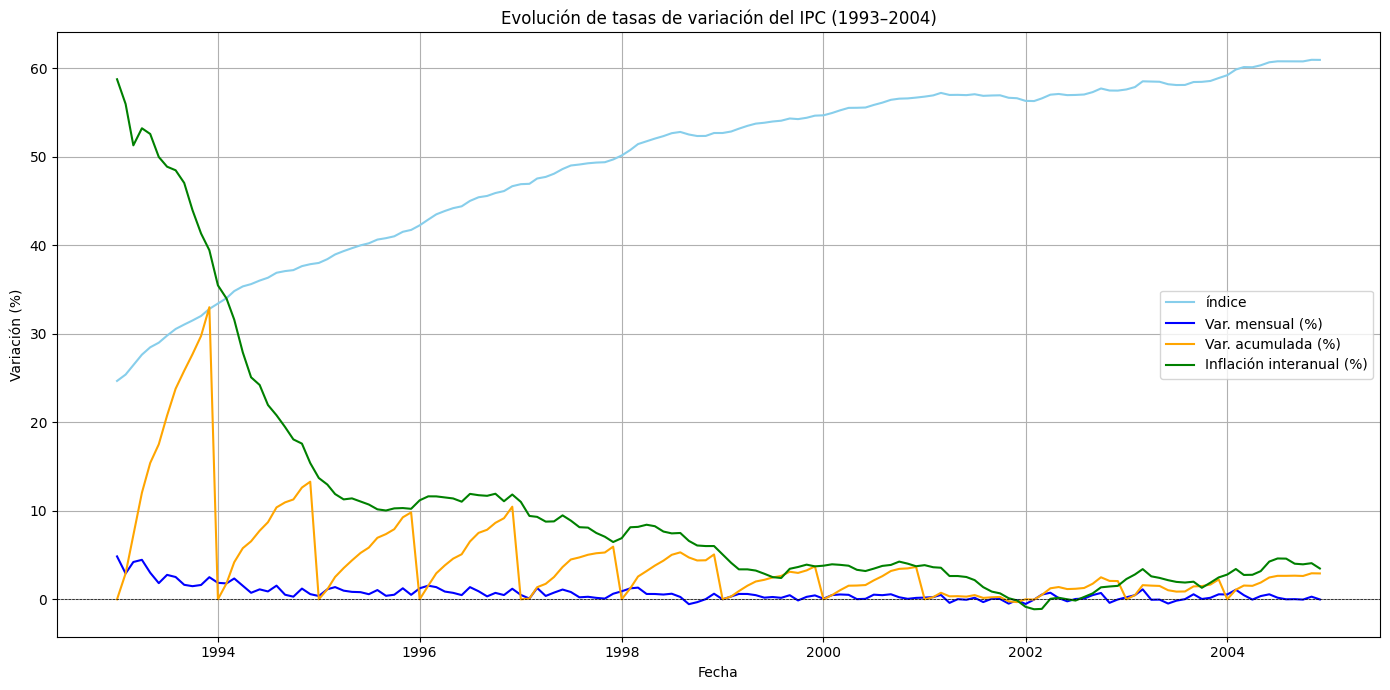

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(ipc_filtrado['Fecha'], ipc_filtrado['IPC (√çndice Dic 2021=100)'], label='√≠ndice', color='skyblue')
plt.plot(ipc_filtrado['Fecha'], ipc_filtrado['Var_mensual_%'], label='Var. mensual (%)', color='blue')
plt.plot(ipc_filtrado['Fecha'], ipc_filtrado['Var_acumulada_%'], label='Var. acumulada (%)', color='orange')
plt.plot(ipc_filtrado['Fecha'], ipc_filtrado['Inflaci√≥n_12m_%'], label='Inflaci√≥n interanual (%)', color='green')

# Personalizaci√≥n
plt.title('Evoluci√≥n de tasas de variaci√≥n del IPC (1993‚Äì2004)')
plt.xlabel('Fecha')
plt.ylabel('Variaci√≥n (%)')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#TASA EN MN MENSUAL

## TASA DE INTERES INTERBANCARIA MN Promedio

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN07819NM/html"
tii = scraping_bcrp(url)
tii.columns = ['Fecha', 'Tasa de inter√©s interbancaria promedio en MN']
tii['Fecha'] = pd.date_range(start="1995-10-01", periods=len(tii), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


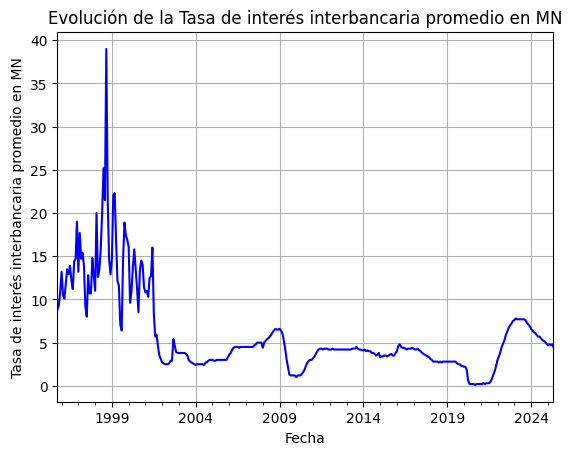

In [ ]:
# L√≠nea temporal
tii.plot(x='Fecha', y='Tasa de inter√©s interbancaria promedio en MN', title='Evoluci√≥n de la Tasa de inter√©s interbancaria promedio en MN', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('Tasa de inter√©s interbancaria promedio en MN')
plt.grid(True)
plt.show()

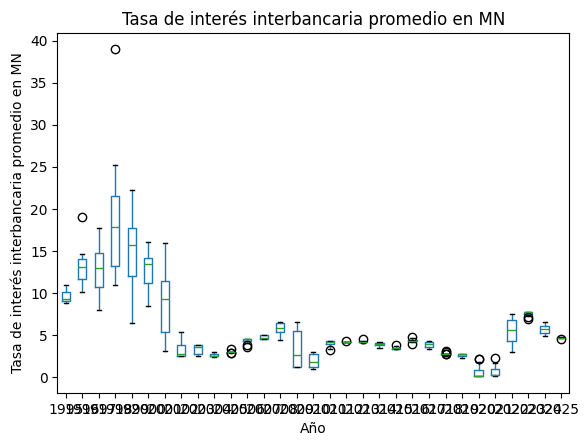

In [ ]:
# Boxplot por a√±o
tii['A√±o'] = tii['Fecha'].dt.year
tii.boxplot(column='Tasa de inter√©s interbancaria promedio en MN', by='A√±o', grid=False)
plt.title('Tasa de inter√©s interbancaria promedio en MN')
plt.suptitle('')
plt.xlabel('A√±o')
plt.ylabel('Tasa de inter√©s interbancaria promedio en MN')
plt.show()

In [ ]:
tii_filt1 = tii[(tii['Fecha'] >= '1993-01-01') & (tii['Fecha'] <= '2004-12-01')]
print(tii_filt1)

         Fecha  Tasa de inter√©s interbancaria promedio en MN   A√±o
0   1995-10-01                                           8.8  1995
1   1995-11-01                                           9.3  1995
2   1995-12-01                                          10.9  1995
3   1996-01-01                                          13.2  1996
4   1996-02-01                                          10.5  1996
..         ...                                           ...   ...
106 2004-08-01                                           2.7  2004
107 2004-09-01                                           2.7  2004
108 2004-10-01                                           2.9  2004
109 2004-11-01                                           3.0  2004
110 2004-12-01                                           3.0  2004

[111 rows x 3 columns]


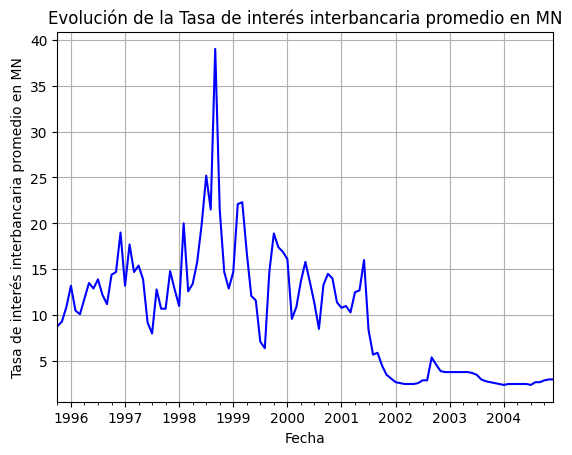

In [ ]:
# L√≠nea temporal
tii_filt1.plot(x='Fecha', y='Tasa de inter√©s interbancaria promedio en MN', title='Evoluci√≥n de la Tasa de inter√©s interbancaria promedio en MN', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('Tasa de inter√©s interbancaria promedio en MN')
plt.grid(True)
plt.show()

#AN√ÅLISIS DE LAS SERIES BASADO EN EL BCRP

##Series usadas por el BCRP

In [ ]:
# Tasa de crecimiento del producto (12 meses) a partir del PBI indice (2007=100)
print(pbi_bcrp)

         Fecha  PBI (Indice 2007=100)   A√±o  Tasa_crecimiento_12m
0   1994-01-01                   53.8  1994                   NaN
1   1994-02-01                   52.1  1994                   NaN
2   1994-03-01                   56.7  1994                   NaN
3   1994-04-01                   56.3  1994                   NaN
4   1994-05-01                   59.7  1994                   NaN
..         ...                    ...   ...                   ...
371 2024-12-01                  205.7  2024              4.895461
372 2025-01-01                  174.3  2025              4.308797
373 2025-02-01                  172.0  2025              2.809325
374 2025-03-01                  179.9  2025              4.653869
375 2025-04-01                  184.3  2025              1.430930

[376 rows x 4 columns]


In [ ]:
# Inflaci√≥n
print(ipc)

         Fecha  IPC (√çndice Dic 2021=100)   A√±o  Var_mensual_%  Mes  \
0   1991-01-01                       7.39  1991            NaN    1   
1   1991-02-01                       8.09  1991       9.472260    2   
2   1991-03-01                       8.71  1991       7.663782    3   
3   1991-04-01                       9.22  1991       5.855339    4   
4   1991-05-01                       9.93  1991       7.700651    5   
..         ...                        ...   ...            ...  ...   
408 2025-01-01                     114.07  2025      -0.087589    1   
409 2025-02-01                     114.28  2025       0.184097    2   
410 2025-03-01                     115.21  2025       0.813791    3   
411 2025-04-01                     115.57  2025       0.312473    4   
412 2025-05-01                     115.51  2025      -0.051917    5   

     IPC_enero  Var_acumulada_%  Inflaci√≥n_12m_%  
0         7.39         0.000000              NaN  
1         7.39         9.472260           

In [ ]:
# Tasa de inter√©s interbancaria en MN
print(tii)

         Fecha  Tasa de inter√©s interbancaria promedio en MN   A√±o
0   1995-10-01                                           8.8  1995
1   1995-11-01                                           9.3  1995
2   1995-12-01                                          10.9  1995
3   1996-01-01                                          13.2  1996
4   1996-02-01                                          10.5  1996
..         ...                                           ...   ...
351 2025-01-01                                           4.7  2025
352 2025-02-01                                           4.8  2025
353 2025-03-01                                           4.7  2025
354 2025-04-01                                           4.8  2025
355 2025-05-01                                           4.5  2025

[356 rows x 3 columns]


###Gr√°ficos comparativos

In [ ]:
# 1. Filtrar por periodo
start_date = '1995-10-01'
end_date = '2019-12-01'

pbi_bcrp_g = pbi_bcrp[(pbi_bcrp['Fecha'] >= start_date) & (pbi_bcrp['Fecha'] <= end_date)]
ipc_g = ipc[(ipc['Fecha'] >= start_date) & (ipc['Fecha'] <= end_date)]
tii_g = tii[(tii['Fecha'] >= start_date) & (tii['Fecha'] <= end_date)]

# 2. Unir en un solo DataFrame por 'Fecha'
df_bcrp = pbi_bcrp_g[['Fecha']].copy()

df_bcrp['PBI Tasa de crecimiento interanual'] = pbi_bcrp_g['Tasa_crecimiento_12m'].values
df_bcrp['Inflaci√≥n (%)'] = ipc_g['Inflaci√≥n_12m_%'].values
df_bcrp['Tasa de inter√©s (%)'] = tii_g['Tasa de inter√©s interbancaria promedio en MN'].values


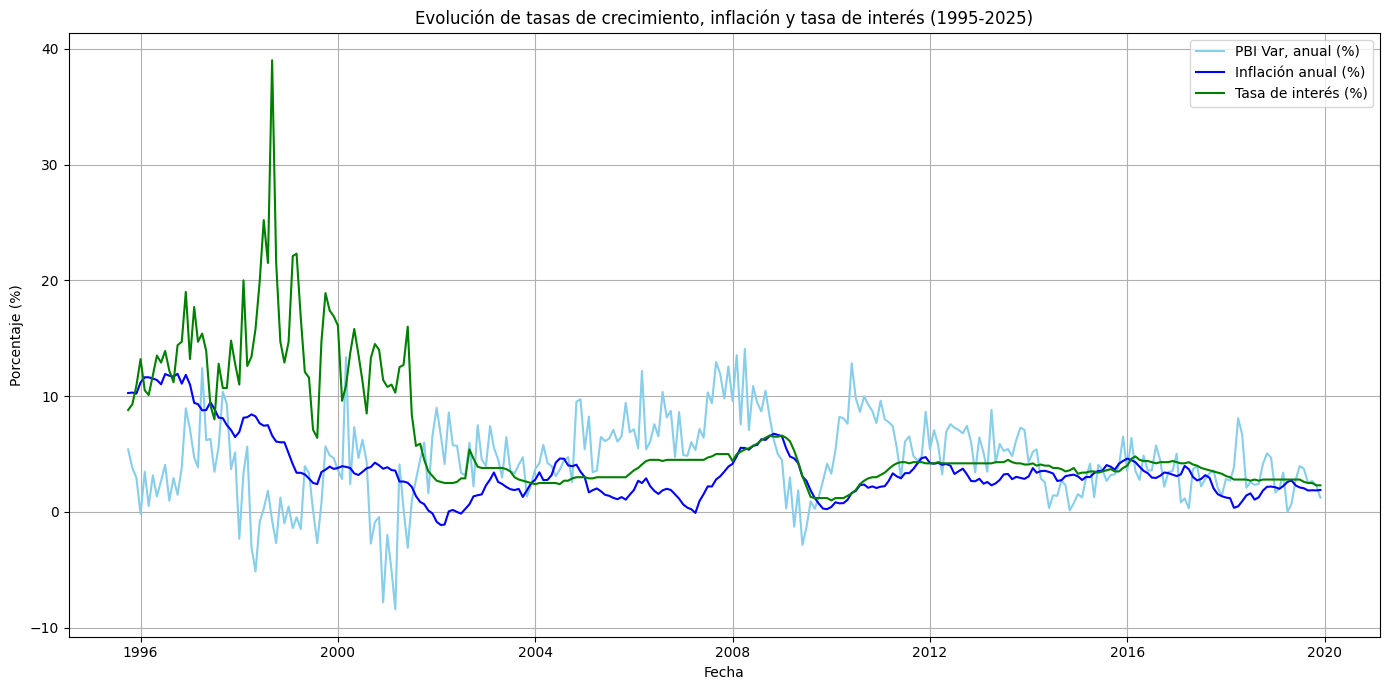

In [ ]:
# 3. Graficar las 3 tasas para comparar el comportamiento
plt.figure(figsize=(14, 7))

plt.plot(df_bcrp['Fecha'], df_bcrp['PBI Tasa de crecimiento interanual'], label='PBI Var, anual (%)', color='skyblue')
plt.plot(df_bcrp['Fecha'], df_bcrp['Inflaci√≥n (%)'], label='Inflaci√≥n anual (%)', color='blue')
plt.plot(df_bcrp['Fecha'], df_bcrp['Tasa de inter√©s (%)'], label='Tasa de inter√©s (%)', color='green')

plt.title('Evoluci√≥n de tasas de crecimiento, inflaci√≥n y tasa de inter√©s (1995-2025)')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

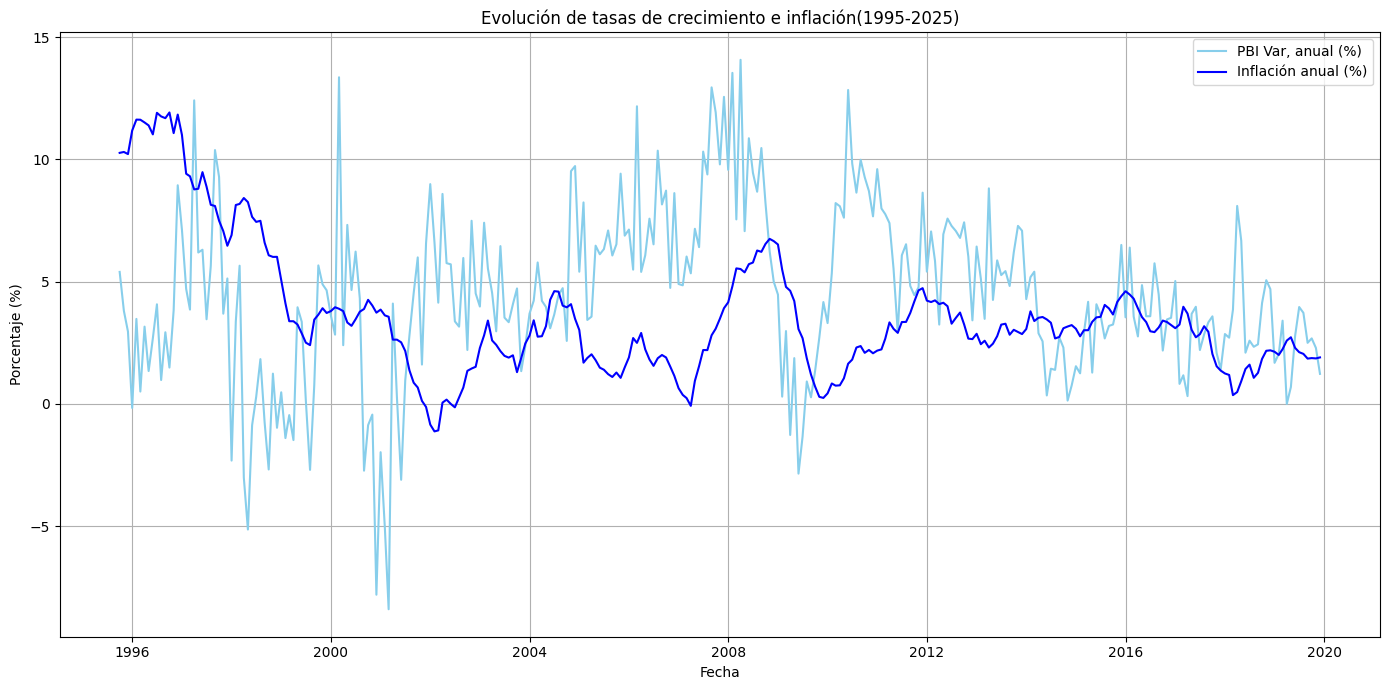

In [ ]:
# 4. Graficar PBI vs Inflacion
plt.figure(figsize=(14, 7))

plt.plot(df_bcrp['Fecha'], df_bcrp['PBI Tasa de crecimiento interanual'], label='PBI Var, anual (%)', color='skyblue')
plt.plot(df_bcrp['Fecha'], df_bcrp['Inflaci√≥n (%)'], label='Inflaci√≥n anual (%)', color='blue')

plt.title('Evoluci√≥n de tasas de crecimiento e inflaci√≥n(1995-2025)')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

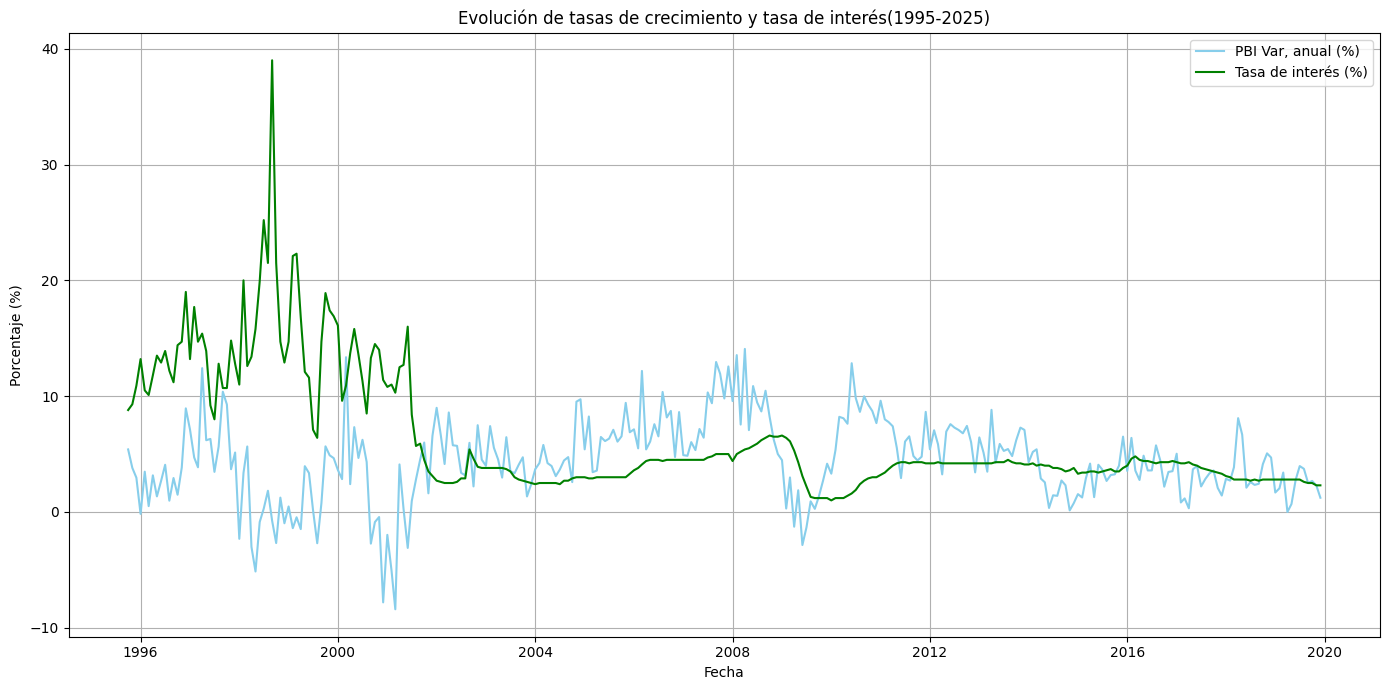

In [ ]:
# 4. Graficar PBI vs tasa de inter√©s
plt.figure(figsize=(14, 7))

plt.plot(df_bcrp['Fecha'], df_bcrp['PBI Tasa de crecimiento interanual'], label='PBI Var, anual (%)', color='skyblue')
plt.plot(df_bcrp['Fecha'], df_bcrp['Tasa de inter√©s (%)'], label='Tasa de inter√©s (%)', color='green')

plt.title('Evoluci√≥n de tasas de crecimiento y tasa de inter√©s(1995-2025)')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

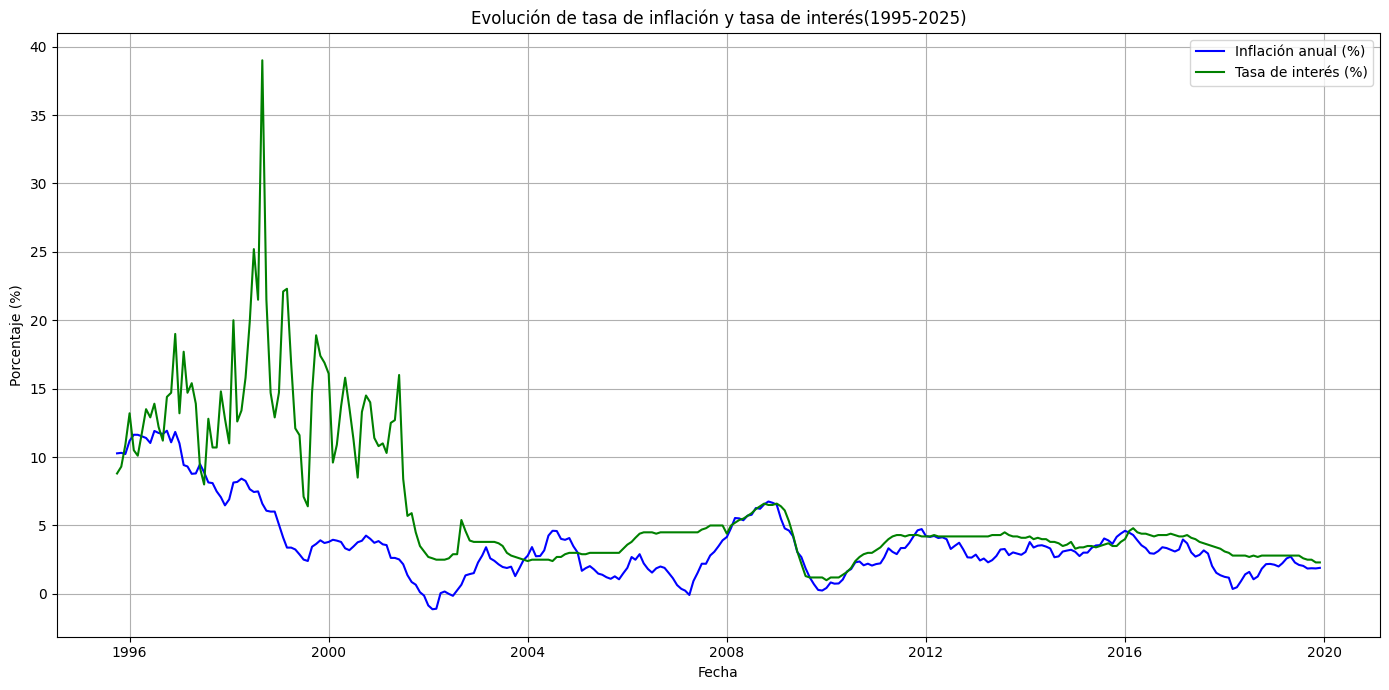

In [ ]:
# 5. Graficar Inflaci√≥n vs tasa de inter√©s
plt.figure(figsize=(14, 7))

plt.plot(df_bcrp['Fecha'], df_bcrp['Inflaci√≥n (%)'], label='Inflaci√≥n anual (%)', color='blue')
plt.plot(df_bcrp['Fecha'], df_bcrp['Tasa de inter√©s (%)'], label='Tasa de inter√©s (%)', color='green')

plt.title('Evoluci√≥n de tasa de inflaci√≥n y tasa de inter√©s(1995-2025)')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

###Matriz de correlaci√≥n

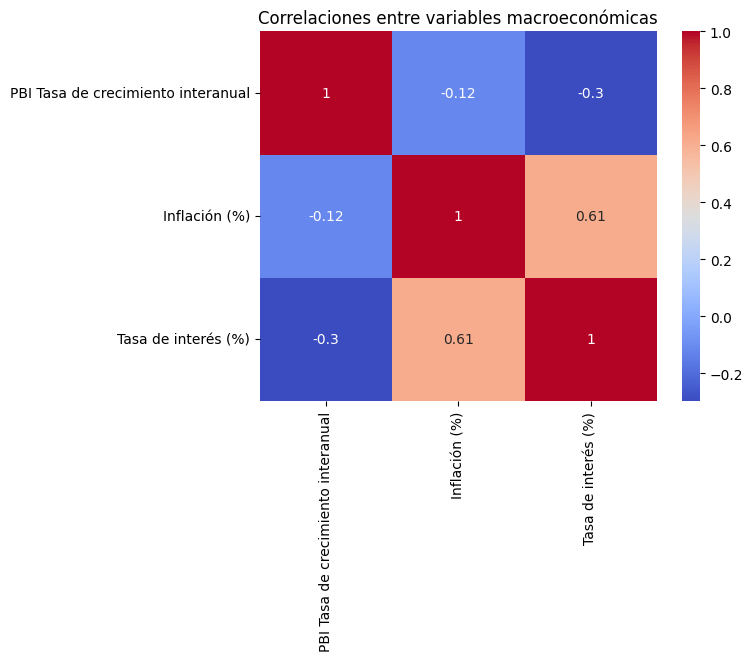

In [ ]:
# 6. Correlaciones

df_corr = df_bcrp[['PBI Tasa de crecimiento interanual', 'Inflaci√≥n (%)', 'Tasa de inter√©s (%)']]
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlaciones entre variables macroecon√≥micas')
plt.show()

###Gr√°ficos de dispersi√≥n

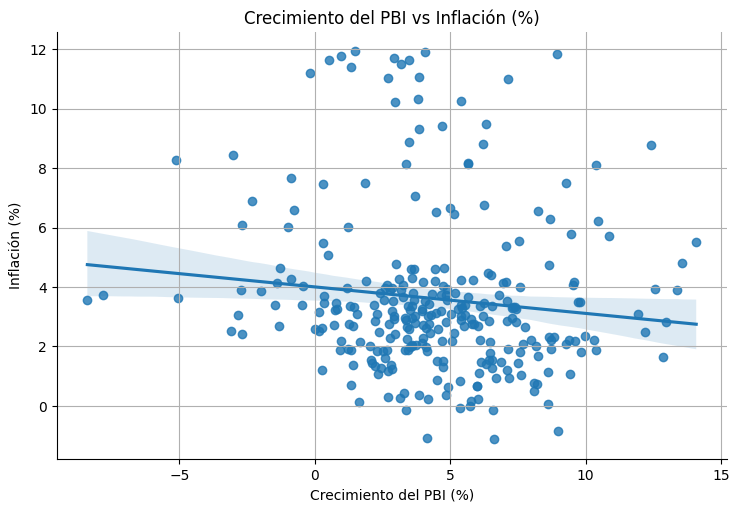

In [ ]:
# 7. Gr√°fico de dispersi√≥n
sns.lmplot(x='PBI Tasa de crecimiento interanual', y='Inflaci√≥n (%)', data=df_bcrp, aspect=1.5)
plt.title('Crecimiento del PBI vs Inflaci√≥n (%)')
plt.xlabel('Crecimiento del PBI (%)')
plt.ylabel('Inflaci√≥n (%)')
plt.grid(True)
plt.show()

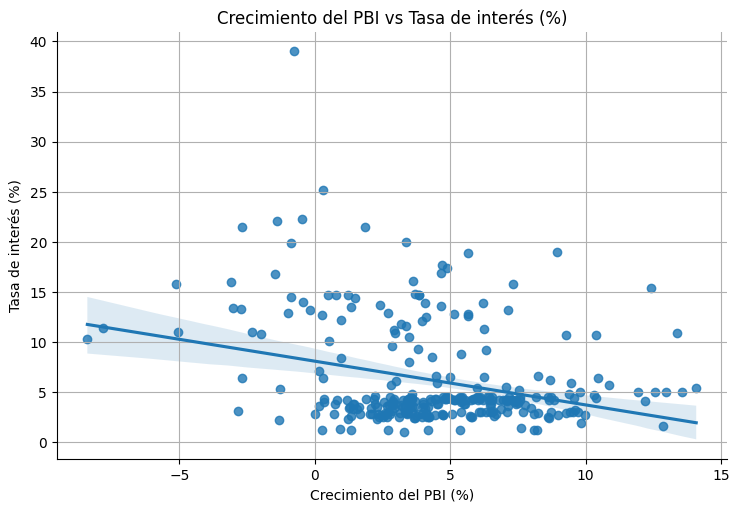

In [ ]:
# 7. Gr√°fico de dispersi√≥n
sns.lmplot(x='PBI Tasa de crecimiento interanual', y='Tasa de inter√©s (%)', data=df_bcrp, aspect=1.5)
plt.title('Crecimiento del PBI vs Tasa de inter√©s (%)')
plt.xlabel('Crecimiento del PBI (%)')
plt.ylabel('Tasa de inter√©s (%)')
plt.grid(True)
plt.show()

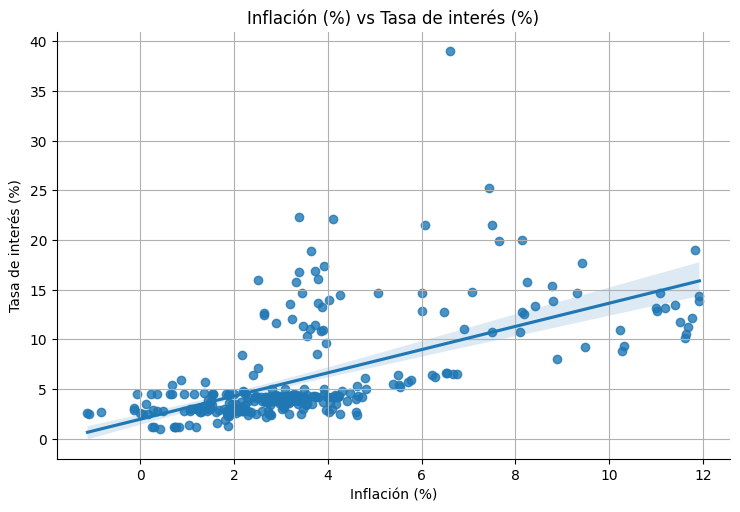

In [ ]:
# 8. Gr√°fico de dispersi√≥n
sns.lmplot(x='Inflaci√≥n (%)', y='Tasa de inter√©s (%)', data=df_bcrp, aspect=1.5)
plt.title('Inflaci√≥n (%) vs Tasa de inter√©s (%)')
plt.xlabel('Inflaci√≥n (%)')
plt.ylabel('Tasa de inter√©s (%)')
plt.grid(True)
plt.show()

###Gr√°ficos de radar: An√°lisis de variables por a√±os, interpretaci√≥n de la econom√≠a, la inflaci√≥n y la pol√≠tica monetaria

In [ ]:
#9. Gr√°fico de radar

# 1. Agregar columna de a√±o y calcular promedios

df_bcrp['A√±o'] = df_bcrp['Fecha'].dt.year
# Agrupamos por a√±o y calculamos el promedio anual
df_anual = df_bcrp.groupby('A√±o').mean(numeric_only=True)

# 2.Seleccionar a√±os a mostrar (por ejemplo, 1998, 2001, 2008, 2015, 2019)

a√±os_a_mostrar = [1998, 2001, 2008, 2015, 2019]
df_radar = df_anual.loc[a√±os_a_mostrar]



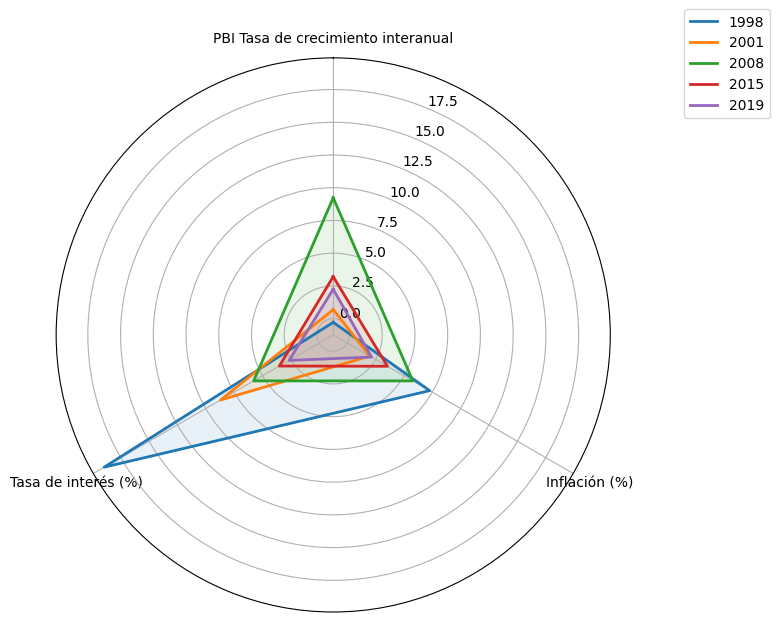

In [ ]:
# 3.Crear gr√°fico radar

# Variables econ√≥micas a mostrar
variables = df_radar.columns.tolist()
num_vars = len(variables)

# √Ångulos para cada eje
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el c√≠rculo

# Crear gr√°fico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Colores para cada a√±o
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Dibujar cada a√±o
for i, a√±o in enumerate(df_radar.index):
    valores = df_radar.loc[a√±o].tolist()
    valores += valores[:1]  # Cerrar c√≠rculo
    ax.plot(angles, valores, label=str(a√±o), linewidth=2, color=colores[i])
    ax.fill(angles, valores, alpha=0.1, color=colores[i])

# Configuraci√≥n del gr√°fico
ax.set_title("", size=14)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), variables)
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

Cada l√≠nea representa un a√±o, y el √°rea cubierta refleja el perfil econ√≥mico:

Un a√±o con alta inflaci√≥n y bajo crecimiento se ver√° diferente a uno con tasas de inter√©s altas y crecimiento fuerte.

Puedes detectar crisis, estabilidad o recuperaci√≥n econ√≥mica.

**A√±o 1998: Alta tasa de inter√©s, inflaci√≥n elevada y recesi√≥n**

*   La tasa de inter√©s promedio fue la mayor de todos los a√±os, siendo superior al 17.5%, con una inflaci√≥n promedio del 7.5%, mayor al resto de a√±os. Con un crecimiento negativo.

    CONTEXTO:
  *   En 1998, Per√∫ sufri√≥ los efectos del fen√≥meno de El Ni√±o y la crisis financiera internacional derivada de Asia y Rusia.

    AN√ÅILISIS:
  *   La pol√≠tica monetaria fue restrictiva: el BCRP elev√≥ fuertemente la tasa de inter√©s para contener la presi√≥n inflacionaria y la salida de capitales.

  *   Una PMC (eleva la tasa de inter√©s) reduce la inversi√≥n y el consumo, generando contracci√≥n del producto. Adem√°s, las expectativas inflacionarias aumentaron por el shock externo (precios de alimentos), lo que empuj√≥ la inflaci√≥n a m√°s del 7%.


**A√±o 2001: Reactivaci√≥n con baja inflaci√≥n y reducci√≥n de tasa**

*   El crecimiento se volvi√≥ positivo y la inflaci√≥n se redujo a menos del 2.5%, la tasa de inter√©s fue mayor del 7.5%.

    CONTEXTO:
  *   Fue un a√±o de transici√≥n pol√≠tica y recuperaci√≥n tras la crisis de finales de los 90. La inflaci√≥n cay√≥ dr√°sticamente, reflejando la credibilidad del r√©gimen de metas expl√≠citas de inflaci√≥n, iniciado en 2002 formalmente.

    AN√ÅLISIS:
  *   Si el banco central logra anclar las expectativas inflacionarias, puede permitir una pol√≠tica monetaria m√°s laxa sin perder control de precios. (Mishkin - PM)

  *   El crecimiento vuelve a ser positivo gracias al impulso fiscal, mejora de confianza y contexto internacional m√°s estable.

**A√±o 2008: Boom econ√≥mico con inflaci√≥n y tasas moderadas**

*   Es el a√±o con mayor crecimiento, llegando a una tasa promedio de casi 10%, las tasas de inflaci√≥n y de inter√©s son parecidas y poco mayores al 5%.

    CONTEXTO:
  *   Fue el pico del superciclo de materias primas, con China demandando fuertemente cobre y metales, y Per√∫ creciendo cerca del 10%.
  *   A pesar del crecimiento acelerado, la inflaci√≥n y la tasa de inter√©s se mantuvieron bajo control.

    AN√ÅLISIS:
  *   Un aumento en la demanda externa impulsa las exportaciones netas, aumentan los ingresos, incrementa la demanda agregada y su acelera el crecimiento. (Romer-Advanced Macroeconomics).
  *   El BCRP respondi√≥ prudentemente, subiendo tasas gradualmente (PMC) para evitar un sobrecalentamiento sin frenar el crecimiento.


**A√±o 2015: Crecimiento moderado con tasas bajas**

*   El crecimiento se redujo a poco m√°s del 2.5%, la tasa de inter√©s y de inflaci√≥n tambi√©n tienen ese porcentaje.

    CONTEXTO:
  *   Despu√©s del fin del boom de commodities, el crecimiento se desacelera y la pol√≠tica monetaria se vuelve m√°s moderada para expandir el producto sin generar presiones inflacionarias. La inflaci√≥n y la tasa de inter√©s se mantuvieron en torno al 2.5%, dentro del rango meta.

    ANALISIS:
  *   Una ca√≠da en la inversi√≥n o en las exportaciones puede reducir el crecimiento.
  *   El BCRP mantiene tasas moderadas para estimular la econom√≠a, sin generar presiones inflacionarias significativas.



**A√±o 2019: Estabilidad macroecon√≥mica, inflaci√≥n controlada y tasas bajas**

*   La tasa de inflaci√≥n se mantuvo respecto al a√±o 2014, mientras que la tasa de inter√©s alcanz√≥ a ser mayor al 2.5% y el crecimiento fue positivoy moderado de 2.5%.

    CONTEXTO:

  *   A pesar de baja inflaci√≥n, el BCRP no redujo agresivamente la tasa de inter√©s por factores de riesgo internacional (guerra comercial China-EEUU) y tensiones pol√≠ticas internas.

    ANALISIS:
  *    En un contexto de estabilidad macroecon√≥mica, con inflaci√≥n controlada y crecimiento moderado, las tasas bajas son consistentes con una pol√≠tica acomodaticia pero cauta. Esto corresponde al escenario de equilibrio descrito en la transici√≥n a ciclos normales seg√∫n Blanchard, donde el objetivo es mantener la estabilidad sin generar desequilibrios.





In [ ]:
# Escalando

scaler = MinMaxScaler()
df_radar_scaled = pd.DataFrame(
    scaler.fit_transform(df_radar),
    index=df_radar.index,
    columns=df_radar.columns
)

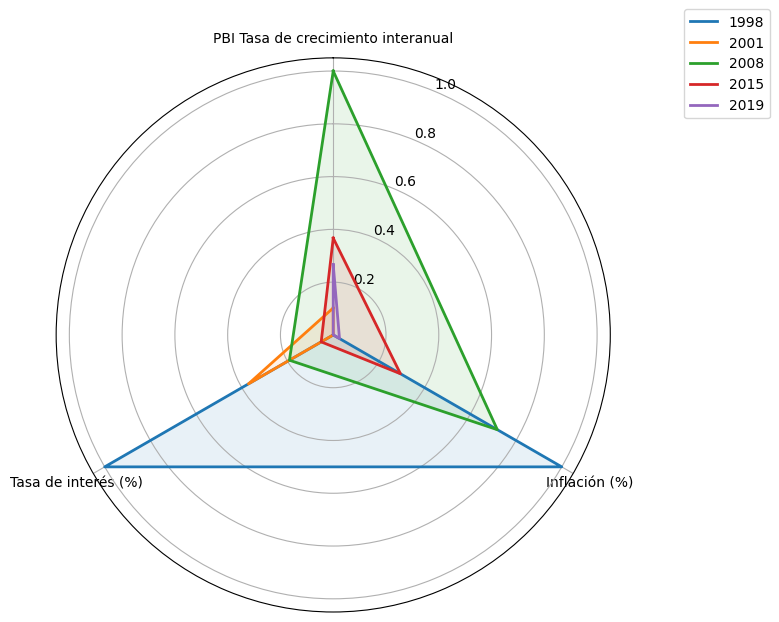

In [ ]:
# 3.Crear gr√°fico radar

# Variables econ√≥micas a mostrar
variables = df_radar_scaled.columns.tolist()
num_vars = len(variables)

# √Ångulos para cada eje
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el c√≠rculo

# Crear gr√°fico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Colores para cada a√±o
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Dibujar cada a√±o
for i, a√±o in enumerate(df_radar_scaled.index):
    valores = df_radar_scaled.loc[a√±o].tolist()
    valores += valores[:1]  # Cerrar c√≠rculo
    ax.plot(angles, valores, label=str(a√±o), linewidth=2, color=colores[i])
    ax.fill(angles, valores, alpha=0.1, color=colores[i])

# Configuraci√≥n del gr√°fico
ax.set_title("", size=14)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), variables)
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

| Valor reescalado | Interpretaci√≥n relativa dentro del conjunto de datos                |
| ---------------- | ------------------------------------------------------------------- |
| **‚âà 1.0**        | Fue el **valor m√°s alto** de esa variable en los a√±os seleccionados |
| **‚âà 0.0**        | Fue el **valor m√°s bajo** de esa variable                           |
| **‚âà 0.5**        | Est√° **en la media** o nivel medio comparado a otros a√±os           |


#ECONOMETR√çA DE SERIES DE TIEMPO

##ESTACIONARIEDAD

**1. Estacionariedad en sentido d√©bil (Weak stationarity o covariance stationarity)**

Definici√≥n formal (seg√∫n Hamilton, L√ºtkepohl y Enders):

Una serie de tiempo $y_{t}$ es d√©bilmente estacionaria si cumple:

  1. $E(y_{t}) = \mu$ , una constante (la media es constante en el tiempo).
  2. $\text{Var}(y_{t}) = \sigma^2$, una constante (la varianza es constante en el tiempo).
  3. $\text{Cov}(y_{t}, y_{t+h}) = \gamma(h)$, depende solo de la distancia ‚Ñé (rezago), no del tiempo ùë°.

Ninguno de estos momentos cambian en el tiempo.

**2. Estacionariedad en sentido fuerte (Strong stationarity)**

Definici√≥n formal:
Una serie $y_{t}$ es fuertemente estacionaria si la distribuci√≥n conjunta de $(y_{t}, y_{t+1}, \dots, y_{t+k})$ es invariante al desplazamiento temporal.

Esto significa que para todo ùëò, ùë°, y cualquier desplazamiento ‚Ñé:

$$
(y_{t}, y_{t+1}, \dots, y_{t+k}) \overset{d}{=} (y_{t+h}, y_{t+1+h}, \dots, y_{t+k+h})
$$

Es decir, que todas las propiedades estad√≠sticas (no solo las primeras dos o tres) permanecen constantes en el tiempo.




| Propiedad                             | Estacionariedad d√©bil | Estacionariedad fuerte |
| ------------------------------------- | --------------------- | ---------------------- |
| Exige media constante                 | ‚úÖ                     | ‚úÖ                      |
| Exige varianza constante              | ‚úÖ                     | ‚úÖ                      |
| Exige autocovarianza constante        | ‚úÖ                     | ‚úÖ                      |
| Exige distribuci√≥n completa constante | ‚ùå                     | ‚úÖ                      |
| Uso com√∫n en econometr√≠a              | ‚úÖ (m√°s pr√°ctica)      | Menos frecuente        |

*   La mayor√≠a de los modelos econom√©tricos (VAR, VECM, ARIMA) requieren solo estacionariedad en sentido d√©bil.

*   Tests como ADF o KPSS eval√∫an la estacionariedad d√©bil, ya que es m√°s verificable emp√≠ricamente

*   Una serie con saltos estructurales o heterocedasticidad puede no ser fuertemente estacionaria, aunque s√≠ lo sea en sentido d√©bil.

###An√°lisis Gr√°fico

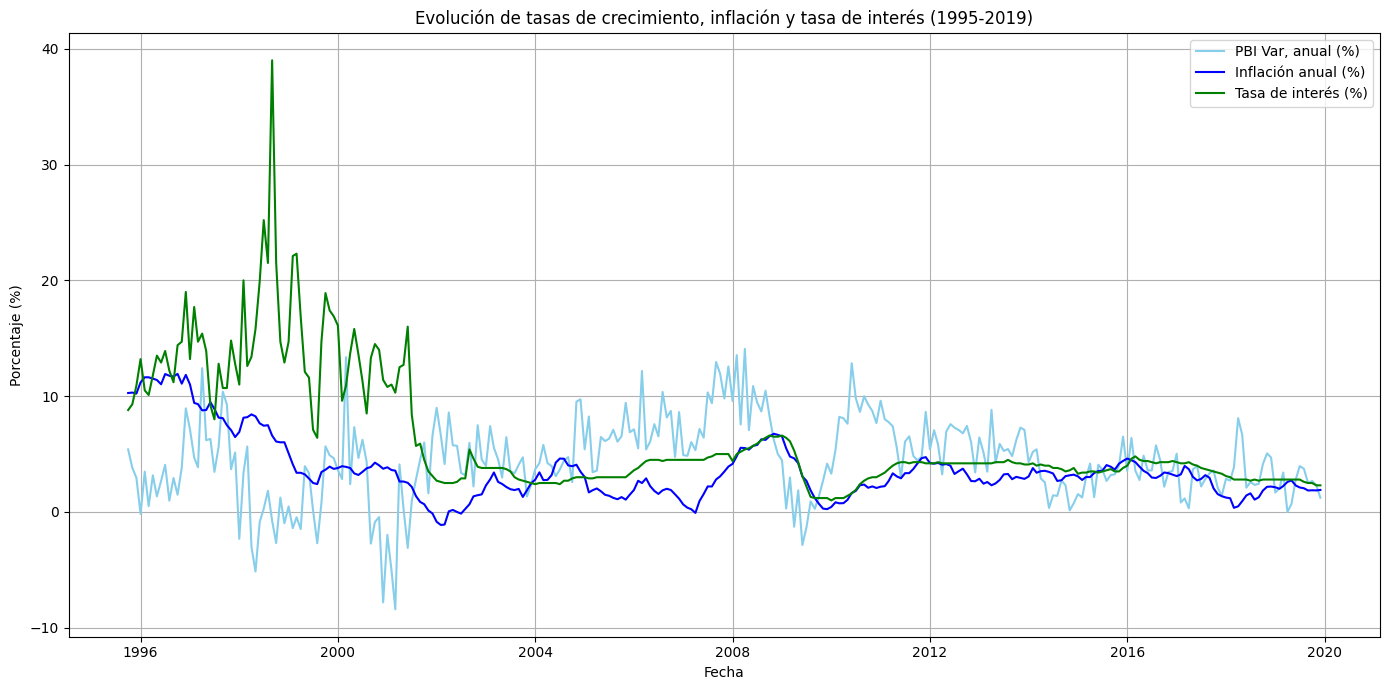

In [ ]:
# 3. Graficar las 3 tasas para comparar el comportamiento
plt.figure(figsize=(14, 7))

plt.plot(df_bcrp['Fecha'], df_bcrp['PBI Tasa de crecimiento interanual'], label='PBI Var, anual (%)', color='skyblue')
plt.plot(df_bcrp['Fecha'], df_bcrp['Inflaci√≥n (%)'], label='Inflaci√≥n anual (%)', color='blue')
plt.plot(df_bcrp['Fecha'], df_bcrp['Tasa de inter√©s (%)'], label='Tasa de inter√©s (%)', color='green')

plt.title('Evoluci√≥n de tasas de crecimiento, inflaci√≥n y tasa de inter√©s (1995-2019)')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

*   Visualmente la inflaci√≥n anual (%) es la serie con la mayor estabilidad a lo largo del tiempo, aunque hubo algo m√°s de volatilidad en los primeros a√±os de 1995 al 2001.
*   La tasa de crecimiento anual del PBI (%) tiene una alta volatilidad entre 1995 al a√±o 2000, luego la volatilidad se estabiliza.
*   La tasa de inter√©s fluctua de manera irregular y su volatilidad es muy alta en periodos de crisis.

Por lo tanto, de las 3 series la que parece acercarde a un comportamiento estacionario d√©bil es la inflaci√≥n, excepto por los primeros a√±os.

    TASA DE INFLACI√ìN:
  *   Enders (2015) tambi√©n destaca que las series inflacionarias pueden comportarse como I(0) en reg√≠menes estables con metas de inflaci√≥n.
  *   Probablemente d√©bilmente estacionaria a partir de 2002, pero posiblemente no estacionaria (o con cambio estructural) en los 90s.
    
    TASA DE CRECIMIENTO DEL PBI:
  *   Puede tratarse de un proceso con cambio estructural, lo cual violar√≠a la hip√≥tesis de estacionariedad d√©bil (Hamilton, cap. 6).
  *   Seg√∫n Enders y L√ºtkepohl, las tasas de crecimiento suelen ser estacionarias si el nivel del PBI es I(1).
  *   No estacionaria en sentido d√©bil. Posible I(1) con cambio estructural.

    TASA DE INTER√âS:
  *   Si la serie muestra saltos abruptos en media/varianza (como en crisis), puede ser no estacionaria o tener volatilidad condicional (ej. procesos ARCH/GARCH).
  *   Hay evidencia de volatilidad cambiante, por lo que requerir√≠a un test adicional (ADF o ARCH test).




| Variable           | Tipo de estacionariedad visual                   | Recomendaci√≥n seg√∫n teor√≠a                         | Referencia clave               |
| ------------------ | ------------------------------------------------ | -------------------------------------------------- | ------------------------------ |
| Inflaci√≥n          | D√©bilmente estacionaria (I(0)) desde 2002        | Test ADF / KPSS por posibles cambios estructurales | Enders (2015), Hamilton (1994), Mishkin (para teor√≠a) |
| PBI (var. anual %)    | No estacionaria (posible I(1))                   | Test ADF, Zivot-Andrews por cambio estructural     | L√ºtkepohl (2005), Enders(2015)           |
| Tasa de inter√©s | Dudosa, posible I(0) pero con heterocedasticidad | Test ADF + ARCH test                               | Hamilton (1994), Stock & Watson (2015)       |


###Correlograma

Para analizar la estacionariedad y la estructura temporal de tus series de tiempo, uno de los primeros pasos recomendados por textos como Hamilton (1994) y Enders (2015) es examinar los correlogramas:

*   FAC (Funci√≥n de Autocorrelaci√≥n): mide la correlaci√≥n entre
$y_{t}$ y sus rezagos.

*   FACP (Funci√≥n de Autocorrelaci√≥n Parcial): mide la correlaci√≥n entre $y_{t}$ y $y_{t-k}$ eliminando el efecto de los rezagos intermedios.



Seg√∫n Enders (2015):

| Tipo de serie          | FAC                                | FACP                       |
| ---------------------- | ---------------------------------- | -------------------------- |
| Estacionaria (AR)      | Disminuye r√°pidamente              | Corte abrupto en alg√∫n lag |
| No estacionaria (I(1)) | FAC persiste alta por mucho tiempo | Disminuye lentamente       |
| MA(q)                  | Corte en FAC                       | Disminuye lentamente       |


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
pbi_fac_facp = df_bcrp['PBI Tasa de crecimiento interanual'].dropna()
plt.figure(figsize=(14, 6))

# Correlograma - FAC
plt.subplot(1, 2, 1)
plot_acf(pbi_fac_facp, lags=24, ax=plt.gca(), title='FAC - PBI Var. % 12 meses')

# Correlograma parcial - FACP
plt.subplot(1, 2, 2)
plot_pacf(pbi_fac_facp, lags=24, ax=plt.gca(), method='ywm', title='FACP - PBI Var. % 12 meses')

plt.tight_layout()
plt.show()


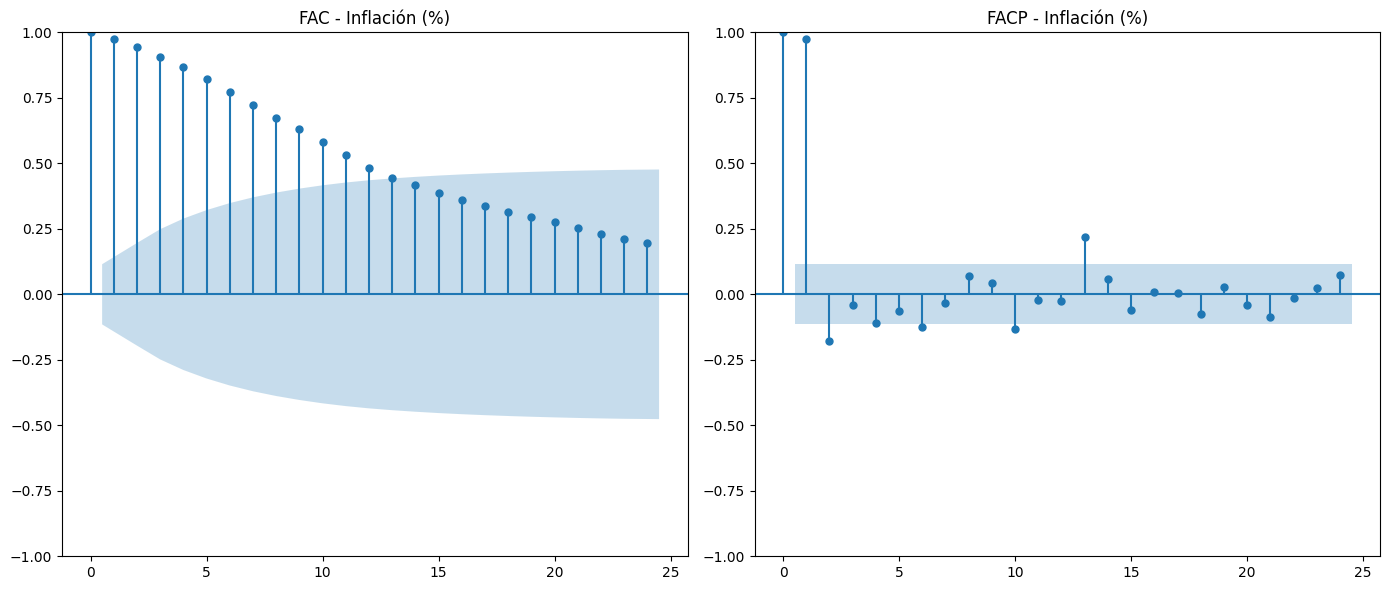

In [ ]:
inf_fac_facp = df_bcrp['Inflaci√≥n (%)'].dropna()
plt.figure(figsize=(14, 6))

# Correlograma - FAC
plt.subplot(1, 2, 1)
plot_acf(inf_fac_facp, lags=24, ax=plt.gca(), title='FAC - Inflaci√≥n (%)')

# Correlograma parcial - FACP
plt.subplot(1, 2, 2)
plot_pacf(inf_fac_facp, lags=24, ax=plt.gca(), method='ywm', title='FACP - Inflaci√≥n (%)')

plt.tight_layout()
plt.show()

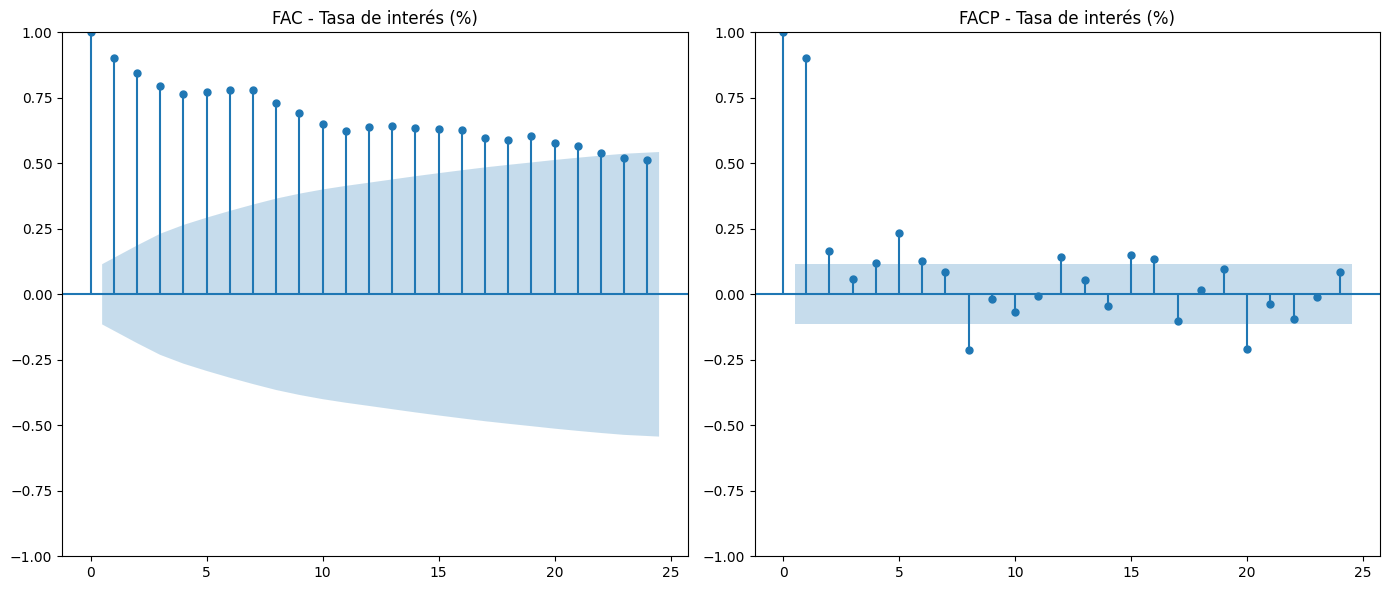

In [ ]:
tii_fac_facp = df_bcrp['Tasa de inter√©s (%)'].dropna()
plt.figure(figsize=(14, 6))

# Correlograma - FAC
plt.subplot(1, 2, 1)
plot_acf(tii_fac_facp, lags=24, ax=plt.gca(), title='FAC - Tasa de inter√©s (%)')

# Correlograma parcial - FACP
plt.subplot(1, 2, 2)
plot_pacf(tii_fac_facp, lags=24, ax=plt.gca(), method='ywm', title='FACP - Tasa de inter√©s (%)')

plt.tight_layout()
plt.show()

###Prueba ADF

**1. Prueba de Dickey-Fuller**

La prueba de Dickey-Fuller eval√∫a si una serie temporal es no estacionaria debido a la presencia de una ra√≠z unitaria.

Se eval√∫a si el proceso sigue un camino aleatorio (random walk) o es estacionario.

**Modelo de base:**

Sup√≥n un proceso autorregresivo de orden 1:
$$y_{t} = \rho y_{t-1} + \varepsilon_{t}$$

Restando $y_{t-1}$ a ambos lados:
$$\Delta y_{t} = (\rho - 1) y_{t-1} + \varepsilon_{t} = \delta y_{t-1} + \varepsilon_{t}$$

Donde: $\delta= \rho -1$

**Hip√≥tesis:**

*   $H_0 : \delta = 0 \;\; \Rightarrow \;\; \rho = 1$ (raiz unitaria - No estacionaria)
*   $H_1 : \delta < 0 \;\; \Rightarrow \;\; \rho < 1$ (Estacionaria)

**Problema: autocorrelaci√≥n en los residuos**

Si $\varepsilon_{t}$ est√° autocorrelado, la prueba DF pierde validez. Por eso se aumenta el modelo incluyendo rezagos de $\Delta y_{t}$



**3. Modelo Aumentado: ADF**

$$\Delta y_t = \alpha + \beta t + \delta y_{t-1} + \sum_{i=1}^{p} \gamma_i \Delta y_{t-i} + \varepsilon_t$$

*   $\alpha$ : constante (drift)
*   $\beta t$ : tendencia determinista
*   $\delta$ : coeficiente clave que prueba si hay ra√≠z unitaria
*   $\sum_{i=1}^{p} \gamma_i \Delta y_{t-i}$ : correcci√≥n por autocorrelaci√≥n








**4. Versiones del test ADF**

| Regresi√≥n | Incluye            | Forma                                        | Interpretaci√≥n                        |
| --------- | ------------------ | -------------------------------------------- | ------------------------------------- |
| `'n'`     | Nada               | $\Delta y_t = \delta y_{t-1} + \ldots$       | Serie estacionaria en torno a 0       |
| `'c'`     | Constante          | $\alpha + \delta y_{t-1} + \ldots$           | Estacionaria en torno a una media     |
| `'ct'`    | Constante + trend  | $\alpha + \beta t + \delta y_{t-1} + \ldots$ | Estacionaria en torno a una tendencia |
| `'ctt'`   | Tambi√©n cuadr√°tica | Poco usada                                   | Muy restrictiva, rara vez se usa      |

Hamilton y L√ºtkepohl recomiendan usar la forma m√°s completa posible (con constante y tendencia) al testear.

**5. Estad√≠stico ADF**

*   Se estima la regresi√≥n por MCO.
*   Se obtiene el estad√≠stico $\tau$ para $\delta$ (el coeficiente de $y_{t-1}$).
*   Se compara con valores cr√≠ticos de Dickey-Fuller (no siguen distribuci√≥n t est√°ndar).

**6. Selecci√≥n de rezagos $\rho$**

Se selecciona para evitar autocorrelaci√≥n en residuos (criterios AIC, BIC o pruebas de Ljung-Box).

**7. Resultado e interpretaci√≥n**

*   Si p-valor < 0.05, rechazas H‚ÇÄ ‚Üí Serie estacionaria.
*   Si p-valor > 0.05, no rechazas H‚ÇÄ ‚Üí Serie no estacionaria.


¬øQu√© variantes de la ADF existen?

En base a los textos como Hamilton, Enders, y L√ºtkepohl, las versiones t√≠picas son:

1.   Sin constante ni tendencia ‚Üí prueba de estacionariedad en torno a 0.
2.   Con constante ‚Üí prueba de estacionariedad en torno a una media constante.
3.   Con constante y tendencia lineal ‚Üí prueba de estacionariedad en torno a una tendencia determinista.
4.   Con rezagos (AR) ‚Üí para controlar autocorrelaci√≥n de los residuos.





In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.tsatools import add_trend
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm

In [ ]:
def prueba_adf_completa(serie, nombre, max_lags=12, criterio='aic'):
    versiones = {
        'N (sin constante ni tendencia)': 'n',
        'C (con constante)': 'c',
        'CT (constante y tendencia)': 'ct'
    }

    print(f"\n{'='*70}")
    print(f"üìä Prueba ADF para: {nombre}")
    print(f"{'='*70}")

    for etiqueta, reg in versiones.items():
        print(f"\nüî∏ {etiqueta}")

        serie_limpia = serie.dropna()
        resultado = adfuller(serie_limpia, maxlag=max_lags, regression=reg, autolag=criterio)

        adf_stat = resultado[0]
        p_value = resultado[1]
        used_lag = resultado[2]
        n_obs = resultado[3]
        crit_values = resultado[4]

        print(f"   ADF = {adf_stat:.4f} | p-value = {p_value:.4f}")
        print(f"   Lags usados: {used_lag} | Observaciones: {n_obs}")
        print("   Valores cr√≠ticos:")
        for nivel, valor in crit_values.items():
            print(f"      {nivel}% ‚áí {valor:.4f}")

        # Prueba Ljung-Box para residuos
        y = serie_limpia.values
        y_diff = pd.Series(np.diff(y), name='dy').dropna()
        resid = y_diff[used_lag:] - y_diff.shift(1)[used_lag:]
        resid = resid.dropna()

        lb_test = acorr_ljungbox(resid, lags=[min(used_lag, 10)], return_df=True)
        lb_stat = lb_test.iloc[0, 0]
        lb_pval = lb_test.iloc[0, 1]
        print(f"   Ljung-Box (lag {min(used_lag, 10)}): stat = {lb_stat:.2f}, p = {lb_pval:.4f}")

        if p_value < 0.05:
            print(f"   ‚úÖ Estacionaria (se rechaza H‚ÇÄ)")
        else:
            print(f"   ‚õî No estacionaria (no se rechaza H‚ÇÄ)")

In [ ]:
# üß™ Ejecutar pruebas para tus columnas:
columnas = [
    'PBI Tasa de crecimiento interanual',
    'Inflaci√≥n (%)',
    'Tasa de inter√©s (%)'
]

In [ ]:
for col in columnas:
    prueba_adf_completa(df_bcrp[col], col)


üìä Prueba ADF para: PBI Tasa de crecimiento interanual

üî∏ N (sin constante ni tendencia)
   ADF = -1.8121 | p-value = 0.0666
   Lags usados: 12 | Observaciones: 278
   Valores cr√≠ticos:
      1%% ‚áí -2.5738
      5%% ‚áí -1.9420
      10%% ‚áí -1.6159
   Ljung-Box (lag 10): stat = 133.78, p = 0.0000
   ‚õî No estacionaria (no se rechaza H‚ÇÄ)

üî∏ C (con constante)
   ADF = -4.0836 | p-value = 0.0010
   Lags usados: 12 | Observaciones: 278
   Valores cr√≠ticos:
      1%% ‚áí -3.4541
      5%% ‚áí -2.8720
      10%% ‚áí -2.5723
   Ljung-Box (lag 10): stat = 133.78, p = 0.0000
   ‚úÖ Estacionaria (se rechaza H‚ÇÄ)

üî∏ CT (constante y tendencia)
   ADF = -4.0479 | p-value = 0.0075
   Lags usados: 12 | Observaciones: 278
   Valores cr√≠ticos:
      1%% ‚áí -3.9917
      5%% ‚áí -3.4264
      10%% ‚áí -3.1364
   Ljung-Box (lag 10): stat = 133.78, p = 0.0000
   ‚úÖ Estacionaria (se rechaza H‚ÇÄ)

üìä Prueba ADF para: Inflaci√≥n (%)

üî∏ N (sin constante ni tendencia)
   ADF = -3

**Interpretaci√≥n de resultados**



1.   PBI

  SIN TENDENCIA Y SIN DRIFT
  *   Modelo sin tendencia y sin drift (constante): Seg√∫n Enders (2014), esta especificaci√≥n se usa cuando se espera que la serie fluct√∫e alrededor de cero sin tendencia ni nivel constante.
  *   Estad√≠stico ADF: -1.8121, Este es el valor calculado para el estad√≠stico œÑ de Dickey-Fuller. Se debe comparar con los valores cr√≠ticos para decidir si se rechaza la hip√≥tesis nula (no estacionariedad).
  *   p-value: 0.0666, es la probabilidad de obtener un estad√≠stico igual o m√°s extremo que el observado si la hip√≥tesis nula es verdadera. Aqu√≠: p ‚âà 0.067 ‚Üí mayor que 0.05, por tanto, no rechazamos H‚ÇÄ al 5%. ***Conclusi√≥n***: no hay evidencia suficiente para decir que la serie es estacionaria.
  *   Lags usados: 12, Se usaron 12 rezagos en el modelo ADF para capturar la autocorrelaci√≥n de orden superior y evitar errores de especificaci√≥n. Hamilton (1994) y L√ºtkepohl (2005) recomiendan seleccionar el n√∫mero √≥ptimo de rezagos por criterios como AIC, BIC o pruebas Ljung-Box.
  *   Observaciones: 278, Es el n√∫mero de observaciones efectivamente usadas tras considerar los rezagos (es decir, datos totales menos los primeros 12).
  *   Valores cr√≠ticos: 1% ‚áí -2.5738, 5% ‚áí -1.9420, 10% ‚áí -1.6159, El estad√≠stico ADF debe ser m√°s negativo que estos valores para rechazar H‚ÇÄ. En este caso ADF=-1.8121 est√° entre -1.942 y -1.615, No supera el umbral del 5% ni del 1%, solo estar√≠a cerca al 10%.
  *   Ljung-Box (lag 10): stat = 133.78, p = 0.0000, Esta es una prueba de autocorrelaci√≥n de los residuos. H‚ÇÄ: los residuos son ruido blanco (sin autocorrelaci√≥n). p = 0.0000 indica autocorrelaci√≥n presente ‚áí los residuos del modelo ADF no son ruido blanco. Esto puede sugerir: Que se necesitan m√°s rezagos en el modelo ADF, o que el modelo est√° mal especificado (quiz√°s necesita incluir constante o tendencia).



2.   PBI

  CON DRIFT, SIN TENDENCIA

    *   Modelo con drift (constante): Seg√∫n Hamilton (1994) y Enders (2014), este modelo es adecuado cuando la serie puede tener una media distinta de cero, pero no muestra tendencia determinista.
    *   El valor del estad√≠stico ADF (-4.0836) es m√°s negativo que todos los valores cr√≠ticos (1%, 5%, 10%).
    *   El p-value = 0.0010 es menor que 0.05, por lo que rechazamos la hip√≥tesis nula (H‚ÇÄ) de ra√≠z unitaria.
    *   ***Conclusi√≥n***: La serie es estacionaria en media, es decir, fluct√∫a alrededor de una constante, sin tendencia determinista.
    *   El p-valor = 0.0000, indica presencia de autocorrelaci√≥n en los residuos del modelo ADF. Seg√∫n L√ºtkepohl (2005) y Greene (2012), esto sugiere que: El modelo podr√≠a necesitar m√°s rezagos o una mejor especificaci√≥n (aunque usaste 12), Si el objetivo fuera modelar din√°micamente (por ejemplo, en un ARIMA), esta autocorrelaci√≥n ser√≠a un problema.
    *   Esto concuerda con la literatura macroecon√≥mica que considera que las tasas de crecimiento suelen revertir a un valor promedio de largo plazo.





3.   PBI

  CON DRIFT Y CON TENDENCIA

  *   Modelo con constante y tendencia lineal:Enders (2014), Hamilton (1994), L√ºtkepohl (2005) Este modelo es √∫til cuando: La serie tiene una media no constante y existe una posible tendencia determinista (lineal).
  *   El estad√≠stico ADF -4.0479 es m√°s negativo que los valores cr√≠ticos en todos los niveles de significancia.
  *   El p-value es 0.0075, menor a 0.01, 0.05 y 0.10. Rechazamos la hip√≥tesis nula de ra√≠z unitaria ‚áí La serie es estacionaria aun teniendo en cuenta una tendencia lineal determinista.
  *   Ljung-Box sobre los residuos, el valor p del test de Ljung-Box = 0.0000 ‚Üí indica que los residuos tienen autocorrelaci√≥n significativa. Esto implica que el modelo ADF puede estar mal especificado (quiz√° m√°s rezagos o incluir otras variables).
  *   Cualquier tendencia observada no es lo suficientemente fuerte como para invalidar la reversi√≥n a una media/tendencia estable.
  *   Las fluctuaciones del crecimiento del PBI en el Per√∫ tienden a mantenerse en torno a un camino estable en el largo plazo, a√∫n cuando hay ciclos o shocks transitorios. Esto es coherente con modelos de ciclos econ√≥micos reales, donde el crecimiento puede desviarse temporalmente, pero retorna a su sendero de equilibrio de largo plazo.








4.   INFLACI√ìN

  SIN CONSTANTE, NI TENDENCIA
  *   El estad√≠stico ADF es m√°s negativo que los tres valores cr√≠ticos, y el p-value es muy bajo ‚Üí
Rechazamos H‚ÇÄ ‚áí la serie es estacionaria, aun sin constante ni tendencia.
  *   Esto sugiere que la inflaci√≥n oscila alrededor de cero, y no hay evidencia de media distinta de cero ni de tendencia determinista. (Ver: Enders, Applied Econometric Time Series, cap. 4)

  CON CONSTANTE, SIN TENDENCIA
  *   Nuevamente, el estad√≠stico ADF es m√°s negativo que todos los valores cr√≠ticos.
Rechazamos H‚ÇÄ ‚áí la serie es estacionaria alrededor de una media constante distinta de cero.
  *   Esto es consistente con un comportamiento donde la inflaci√≥n fluct√∫a alrededor de una media estable en el tiempo, sin tendencia determinista. (Hamilton, Time Series Analysis, secci√≥n 17.3)

  CON CONSTANTE, CON TENDENCIA
  *   El estad√≠stico ADF es menor que los valores cr√≠ticos del 1% y 5%, pero no suficiente para rechazarlos.
Solo se ubica por debajo del 10%.
Por lo tanto, no se rechaza H‚ÇÄ ‚áí no se concluye que sea estacionaria en presencia de una tendencia determinista.
  *   Esto indica que, si asumimos que la inflaci√≥n sigue una tendencia lineal a largo plazo, no podemos confirmar su estacionariedad.

  Ljung-Box
  *   En todos los casos, el p-value del test de Ljung-Box es 0.0000 ‚Üí indica autocorrelaci√≥n significativa en los residuos. Esto sugiere que los rezagos incluidos (lags=12) no eliminaron completamente la din√°mica temporal, lo cual debe tomarse en cuenta al modelar (por ejemplo, puede preferirse usar m√°s rezagos o modelos VAR).
  







5.   TASA DE INTER√âS

  SIN CONSTANTE, NI TENDENCIA
  *   El estad√≠stico est√° entre los valores cr√≠ticos del 5% y 10%, pero el p-value > 0.05, por lo tanto: No se rechaza H‚ÇÄ ‚Üí la serie tiene ra√≠z unitaria y no es estacionaria en nivel.
  *   Asumir que la serie fluct√∫a alrededor de cero no mejora la potencia del test. Posiblemente tiene una media distinta de cero o alguna tendencia.

  CON CONSTANTE, SIN TENDENCIA
  *   El estad√≠stico est√° muy por encima de los valores cr√≠ticos ‚Üí no se rechaza H‚ÇÄ.
  *   No hay evidencia de que la tasa de inter√©s se mantenga estable alrededor de una media constante. Indica posible presencia de ra√≠z unitaria.

  CON CONSTANTE Y CON TENDENCIA
  *   El estad√≠stico es mucho m√°s alto que los valores cr√≠ticos ‚Üí nuevamente, no se rechaza H‚ÇÄ.
  *   Aunque se incluye una tendencia lineal determinista, no se encuentra evidencia de reversi√≥n a dicha tendencia.

  TEST LJUNG-BOX(LAG 7)
  *   Stat = 122.90, p-value = 0.0000, que indica autocorrelaci√≥n significativa en los residuos.
  *   Implica que la din√°mica temporal no se ha captado completamente con los lags utilizados (aqu√≠ 7).

  CONCLUSI√ìN
  *   Seg√∫n Hamilton (1994) y Enders (2015), cuando ninguna especificaci√≥n del test ADF permite rechazar la hip√≥tesis nula de ra√≠z unitaria, se concluye que la serie no es estacionaria en nivel.
  *   La serie de tasa de inter√©s interbancaria promedio en MN requiere diferenciaci√≥n para lograr estacionariedad. Tambi√©n es importante considerar su transformaci√≥n logar√≠tmica o tasas de variaci√≥n, dependiendo del an√°lisis econ√≥mico que se quiere realizar (por ejemplo, con modelos VAR o VECM m√°s adelante).


